In [2]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [5]:
# read in data

data_ra = np.load('/Users/mtownsend/Documents/LRG_Data/ra_total.npz')
ra_total = data_ra['ra']
# print(ra_total.shape)

# print('----')

data_dec = np.load('/Users/mtownsend/Documents/LRG_Data/dec_total.npz')
dec_total = data_dec['dec']
# print(dec_total.shape)

# print('----')

data_gmag = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz')
gmag_total = data_gmag['gmag']
# print(gmag_total.shape)

# print('----')

data_rmag = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz')
rmag_total = data_rmag['rmag']
# print(rmag_total.shape)

# print('----')

data_zmag = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz')
zmag_total = data_zmag['zmag']
# print(zmag_total.shape)

# print('----')

data_grcolor = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz')
grcolor_total = data_grcolor['grcolor']
# print(grcolor_total.shape)

# print('----')

data_rzcolor = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz')
rzcolor_total = data_rzcolor['rzcolor']
# print(rzcolor_total.shape)


In [6]:
# read in indices assigned as random pointings

data_index_lowz = np.load('/Users/mtownsend/Documents/LRG_Data/index_lowz.npz')
index_lowz = data_index_lowz['index_lowz']
print(index_lowz)

data_index_midz1 = np.load('/Users/mtownsend/Documents/LRG_Data/index_midz1.npz')
index_midz1 = data_index_midz1['index_midz1']
print(index_midz1)

data_index_midz2 = np.load('/Users/mtownsend/Documents/LRG_Data/index_midz2.npz')
index_midz2 = data_index_midz2['index_midz2']
print(index_midz2)

data_index_midz3 = np.load('/Users/mtownsend/Documents/LRG_Data/index_midz3.npz')
index_midz3 = data_index_midz3['index_midz3']
print(index_midz3)

data_index_highz = np.load('/Users/mtownsend/Documents/LRG_Data/index_highz.npz')
index_highz = data_index_highz['index_highz']
print(index_highz)

[ 65197 426408 117669 ... 159522 449206  94330]
[234297 291919 433679 ...  83417 246046 428425]
[256190 464126 182923 ... 376404 131772 299287]
[154348  83296  43124 ...  70194   4939 470802]
[218182 500265 239433 ... 241240 144182 167813]


In [45]:
# create arrays with random pointings and background

# make a random data set that I will treat as LRGs
random_raLRG = ra_total[index_highz]
random_decLRG = dec_total[index_highz]
random_gmagLRG = gmag_total[index_highz]
random_rmagLRG = rmag_total[index_highz]
random_zmagLRG = zmag_total[index_highz]
random_grcolorLRG = grcolor_total[index_highz]
random_rzcolorLRG = rzcolor_total[index_highz]

# eliminate "LRGs" from background catalog
random_raBKG = np.delete(ra_total, index_highz)
random_decBKG = np.delete(dec_total, index_highz)
random_gmagBKG = np.delete(gmag_total, index_highz)
random_rmagBKG = np.delete(rmag_total, index_highz)
random_zmagBKG = np.delete(zmag_total, index_highz)
random_grcolorBKG = np.delete(grcolor_total, index_highz)
random_rzcolorBKG = np.delete(rzcolor_total, index_highz)

# print(len(random_raLRG))
# print(len(random_raBKG))
# print(len(ra_total))
# print(len(random_raLRG) + len(random_raBKG))

ra_tot = np.concatenate([random_raLRG, random_raBKG])
dec_tot = np.concatenate([random_decLRG, random_decBKG])
gmag_tot = np.concatenate([random_gmagLRG, random_gmagBKG])
rmag_tot = np.concatenate([random_rmagLRG, random_rmagBKG])
zmag_tot = np.concatenate([random_zmagLRG, random_zmagBKG])
rzcolor_tot = np.concatenate([random_rzcolorLRG, random_rzcolorBKG])
grcolor_tot = np.concatenate([random_grcolorLRG, random_grcolorBKG])

# print(len(ra_tot))
# print(len(dec_tot))
# print(len(gmag_tot))
# print(len(rmag_tot))
# print(len(zmag_tot))
# print(len(rzcolor_tot))
# print(len(rzcolor_tot))

In [7]:
# each random pointing is assiged a redshift from the real distribution of LRG redshifts

data_random_z_low = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_low.npz')
random_z_low = data_random_z_low['random_z_low']

data_random_z_mid1 = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_mid1.npz')
random_z_mid1 = data_random_z_mid1['random_z_mid1']

data_random_z_mid2 = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_mid2.npz')
random_z_mid2 = data_random_z_mid2['random_z_mid2']

data_random_z_mid3 = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_mid3.npz')
random_z_mid3 = data_random_z_mid3['random_z_mid3']

data_random_z_high = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_high.npz')
random_z_high = data_random_z_high['random_z_high']

# print(len(random_z_high[np.where((random_z_high >=0.2) & (random_z_high < 0.25))]))
# print(len(random_z_high[np.where((random_z_high >=0.25) & (random_z_high < 0.3))]))
# print(len(random_z_high[np.where((random_z_high >=0.3) & (random_z_high < 0.35))]))
# print(len(random_z_high[np.where((random_z_high >=0.35) & (random_z_high < 0.4))]))
# print(len(random_z_high[np.where((random_z_high >=0.4) & (random_z_high < 0.45))]))
# print(len(random_z_high[np.where((random_z_high >=0.45) & (random_z_high < 0.5))]))
# print(len(random_z_high[np.where((random_z_high >=0.5) & (random_z_high < 0.55))]))
# print(len(random_z_high[np.where((random_z_high >=0.55) & (random_z_high < 0.6))]))
# print(len(random_z_high[np.where((random_z_high >=0.6) & (random_z_high < 0.65))]))


## Run analysis to find null result

In [47]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(random_z_high)

print("end cosmoCalc")


end cosmoCalc


In [48]:
rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))


H1, nouse_edges = np.histogramdd((rzcolor_tot, grcolor_tot, zmag_tot), bins=(rz_edges, gr_edges, zmag_edges), density=False)


<class 'numpy.ndarray'>


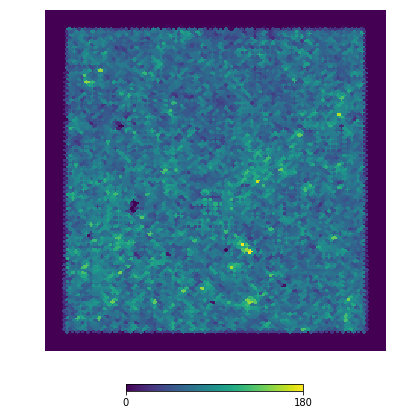

length phi:  519348


In [49]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra_tot)):
    theta.append(np.radians(90. - dec_tot[i]))
    phi.append(np.radians(ra_tot[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/HEALPix-survey-density-v2.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)

In [50]:
distance = 0.5 # must be in Mpc

# distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, random_raLRG, random_decLRG, random_raBKG, random_decBKG, random_zmagLRG, random_zmagBKG, random_rzcolorLRG, random_rzcolorBKG, random_grcolorLRG, random_grcolorBKG, nouse_edges)
distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, random_raLRG, random_decLRG, random_raBKG, random_decBKG, random_zmagLRG, random_zmagBKG, random_rzcolorLRG, random_rzcolorBKG, random_grcolorLRG, random_grcolorBKG, nouse_edges)

print('end nearNeighbor')


end nearNeighbor


In [3]:
# save near array

# np.savez('/Users/mtownsend/Documents/LRG_Data/null_near_high.npz', near=near)
near_data = np.load('/Users/mtownsend/Documents/LRG_Data/null_near_high.npz')
near = near_data['near']

# save indices of near neighbors

# np.savez('/Users/mtownsend/Documents/LRG_Data/near_index_null_high.npz', index=index)
null_near_index = np.load('/Users/mtownsend/Documents/LRG_Data/near_index_null_high.npz')
near_index = null_near_index['index']


In [52]:
inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, random_raLRG, random_decLRG, pixnums, zmag_tot, rzcolor_tot, grcolor_tot, nouse_edges, distance_kpc, kpc_DA)

omega = np.array(omega)

print("end bkg")


end bkg


In [5]:
# save bkg array

# np.savez('/Users/mtownsend/Documents/LRG_Data/null_bkg_high.npz', Nbkg=Nbkg)
Nbkg_data = np.load('/Users/mtownsend/Documents/LRG_Data/null_bkg_high.npz')
Nbkg = Nbkg_data['Nbkg']


In [8]:
# calculate Nsat, and Nsat in bins of redshift

Nsat = np.array(near) - np.array(Nbkg)

# near in bins of redshift

near_arr = np.asarray(near)

near25 = near_arr[np.where((random_z_high >= 0.2) & (random_z_high < 0.25))]
near03 = near_arr[np.where((random_z_high >= 0.25) & (random_z_high < 0.3))]
near35 = near_arr[np.where((random_z_high >= 0.3) & (random_z_high < 0.35))]
near04 = near_arr[np.where((random_z_high >= 0.35) & (random_z_high < 0.4))]
near45 = near_arr[np.where((random_z_high >= 0.4) & (random_z_high < 0.45))]
near05 = near_arr[np.where((random_z_high >= 0.45) & (random_z_high < 0.5))]
near55 = near_arr[np.where((random_z_high >= 0.5) & (random_z_high < 0.55))]
near06 = near_arr[np.where((random_z_high >= 0.55) & (random_z_high < 0.6))]
near65 = near_arr[np.where((random_z_high >= 0.6) & (random_z_high < 0.65))]


# Nbkg in bins of redshift

Nbkg_arr = np.asarray(Nbkg)

Nbkg25 = Nbkg_arr[np.where((random_z_high >= 0.2) & (random_z_high < 0.25))]
Nbkg03 = Nbkg_arr[np.where((random_z_high >= 0.25) & (random_z_high < 0.3))]
Nbkg35 = Nbkg_arr[np.where((random_z_high >= 0.3) & (random_z_high < 0.35))]
Nbkg04 = Nbkg_arr[np.where((random_z_high >= 0.35) & (random_z_high < 0.4))]
Nbkg45 = Nbkg_arr[np.where((random_z_high >= 0.4) & (random_z_high < 0.45))]
Nbkg05 = Nbkg_arr[np.where((random_z_high >= 0.45) & (random_z_high < 0.5))]
Nbkg55 = Nbkg_arr[np.where((random_z_high >= 0.5) & (random_z_high < 0.55))]
Nbkg06 = Nbkg_arr[np.where((random_z_high >= 0.55) & (random_z_high < 0.6))]
Nbkg65 = Nbkg_arr[np.where((random_z_high >= 0.6) & (random_z_high < 0.65))]


# Nsat in bins of redshift

Nsat25 = near25 - Nbkg25
Nsat03 = near03 - Nbkg03
Nsat35 = near35 - Nbkg35
Nsat04 = near04 - Nbkg04
Nsat45 = near45 - Nbkg45
Nsat05 = near05 - Nbkg05
Nsat55 = near55 - Nbkg55
Nsat06 = near06 - Nbkg06
Nsat65 = near65 - Nbkg65

print('end Nsat')


end Nsat


## Add models to near neighbors null result and calculate Nsat again

In [55]:
# read in mask and initialize function needed to add satellites to null result

data_zmag = np.load('/Users/mtownsend/Documents/LRG_Data/highz_medzmag-9matrices.npz')
medzmag = data_zmag['medzmag_low']
print(medzmag.shape)
medzmag0 = medzmag[0]
medzmag1 = medzmag[1]
medzmag2 = medzmag[2]
medzmag3 = medzmag[3]
medzmag4 = medzmag[4]
medzmag5 = medzmag[5]
medzmag6 = medzmag[6]
medzmag7 = medzmag[7]
medzmag8 = medzmag[8]

def adding_sats(medzmag, index, rzcolor_total, grcolor_total, zmag_total, rz_edges, gr_edges, lam):
    
    # index == index of sources found to be 500 kpc from LRG pointing
    # medzmag == array of zmags that correspond to luminosity limits for each cell of r-z and g-r color
    # rzcolor_total, grcolor_total, zmag_total == 1D arrays with colors and magnitude of all sources
    # rz_edges, gr_edges == edges of r-z vs g-r color space
    # lam == mean of poisson distribution from which the function draws the number of sources to be added
    
    import numpy as np
    
    rz = rzcolor_total[index]
    gr = grcolor_total[index]
    zmag = zmag_total[index]

    candidate_index = []

    # This loop finds the galaxies in color-color cells that meet the critera of median_zmag in those cells
    for i in range(len(rz_edges) - 1):
        for j in range(len(gr_edges) - 1):
            for m in range(len(rz)):
                if ((rz[m] >= rz_edges[i]) & (rz[m] <= rz_edges[i + 1]) & (gr[m] >= gr_edges[j]) & (gr[m] <= gr_edges[j + 1]) & (zmag[m] <= medzmag[i][j])):
                    candidate_index.append(m)
#     print('candidate index: ', candidate_index)
    # draw number of from gaussian
#      N = np.random.normal(loc=1., scale=1., size=1)
    N = np.random.poisson(lam=lam, size=1)
#     print(N)
    num = round(float(N))
#     print(num)
#     a = np.random.choice(candidate_index, size=int(num), replace=True)
    if (len(candidate_index) > 0.):
        a = np.random.choice(candidate_index, size=int(num), replace=True)
#         print(len(a))
        new_rz = np.concatenate((rz,rz[a]))
        new_gr = np.concatenate((gr,gr[a]))
        new_zmag = np.concatenate((zmag,zmag[a]))
    else:
        new_rz = rz
        new_gr = gr
        new_zmag = zmag
    
    return new_rz, new_gr, new_zmag, candidate_index

(9, 49, 49)


In [134]:
# medzmag2[medzmag2 == -999] = 0.

# plt.figure(figsize=(10,10))
# ax = plt.gca()
# im = ax.imshow(medzmag2, origin='lower', extent=(gr_edges.min(), gr_edges.max(), rz_edges.min(), rz_edges.max()))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='5%', pad=0.05)
# plt.colorbar(im, cax=cax)
# ax.set_title("Median zmag")
# # plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/9July2020/a-medzmag-21.64-overplot.pdf')
# plt.show()

In [56]:
# bin near indices by redshift

high_nearindex25 = near_index[np.where((random_z_high >= 0.2) & (random_z_high < 0.25))]
high_nearindex03 = near_index[np.where((random_z_high >= 0.25) & (random_z_high < 0.3))]
high_nearindex35 = near_index[np.where((random_z_high >= 0.3) & (random_z_high < 0.35))]
high_nearindex04 = near_index[np.where((random_z_high >= 0.35) & (random_z_high < 0.4))]
high_nearindex45 = near_index[np.where((random_z_high >= 0.4) & (random_z_high < 0.45))]
high_nearindex05 = near_index[np.where((random_z_high >= 0.45) & (random_z_high < 0.5))]
high_nearindex55 = near_index[np.where((random_z_high >= 0.5) & (random_z_high < 0.55))]
high_nearindex06 = near_index[np.where((random_z_high >= 0.55) & (random_z_high < 0.6))]
high_nearindex65 = near_index[np.where((random_z_high >= 0.6) & (random_z_high < 0.65))]


print(len(high_nearindex25))
print(len(high_nearindex03))
print(len(high_nearindex35))
print(len(high_nearindex04))
print(len(high_nearindex45))
print(len(high_nearindex05))
print(len(high_nearindex55))
print(len(high_nearindex06))
print(len(high_nearindex65))

228
233
369
344
515
844
1030
900
537


In [57]:
# loop through random pointings to get models

new_rz25 = []
new_gr25 = []
new_zmag25 = []
new_index25 = []

for i in range(len(high_nearindex25)):
    temp_rz25, temp_gr25, temp_zmag25, temp_index25 = adding_sats(medzmag0, high_nearindex25[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
#     print(i)
    new_rz25.append(temp_rz25)
    new_gr25.append(temp_gr25)
    new_zmag25.append(temp_zmag25)
    new_index25.append(temp_index25)
    
print('end 25')
    

new_rz03 = []
new_gr03 = []
new_zmag03 = []
new_index03 = []

for i in range(len(high_nearindex03)):
    temp_rz03, temp_gr03, temp_zmag03, temp_index03 = adding_sats(medzmag1, high_nearindex03[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
#     print(i)
    new_rz03.append(temp_rz03)
    new_gr03.append(temp_gr03)
    new_zmag03.append(temp_zmag03)
    new_index03.append(temp_index03)

print('end 03')
    
new_rz35 = []
new_gr35 = []
new_zmag35 = []
new_index35 = []

for i in range(len(high_nearindex35)):
    temp_rz35, temp_gr35, temp_zmag35, temp_index35 = adding_sats(medzmag2, high_nearindex35[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
#     print(i)
    new_rz35.append(temp_rz35)
    new_gr35.append(temp_gr35)
    new_zmag35.append(temp_zmag35)
    new_index35.append(temp_index35)
    
print('end 35')
    
new_rz04 = []
new_gr04 = []
new_zmag04 = []
new_index04 = []

for i in range(len(high_nearindex04)):
    temp_rz04, temp_gr04, temp_zmag04, temp_index04 = adding_sats(medzmag3, high_nearindex04[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
#     print(i)
    new_rz04.append(temp_rz04)
    new_gr04.append(temp_gr04)
    new_zmag04.append(temp_zmag04)
    new_index04.append(temp_index04)

print('end 04')

new_rz45 = []
new_gr45 = []
new_zmag45 = []
new_index45 = []

for i in range(len(high_nearindex45)):
    temp_rz45, temp_gr45, temp_zmag45, temp_index45 = adding_sats(medzmag4, high_nearindex45[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
#     print(i)
    new_rz45.append(temp_rz45)
    new_gr45.append(temp_gr45)
    new_zmag45.append(temp_zmag45)
    new_index45.append(temp_index45)

print('end 45')
    
new_rz05 = []
new_gr05 = []
new_zmag05 = []
new_index05 = []

for i in range(len(high_nearindex05)):
    temp_rz05, temp_gr05, temp_zmag05, temp_index05 = adding_sats(medzmag5, high_nearindex05[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
#     print(i)
    new_rz05.append(temp_rz05)
    new_gr05.append(temp_gr05)
    new_zmag05.append(temp_zmag05)
    new_index05.append(temp_index05)

print('end 05')
    
new_rz55 = []
new_gr55 = []
new_zmag55 = []
new_index55 = []

for i in range(len(high_nearindex55)):
    temp_rz55, temp_gr55, temp_zmag55, temp_index55 = adding_sats(medzmag6, high_nearindex55[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
#     print(i)
    new_rz55.append(temp_rz55)
    new_gr55.append(temp_gr55)
    new_zmag55.append(temp_zmag55)
    new_index55.append(temp_index55)
    
print('end 55')

new_rz06 = []
new_gr06 = []
new_zmag06 = []
new_index06 = []

for i in range(len(high_nearindex06)):
    temp_rz06, temp_gr06, temp_zmag06, temp_index06 = adding_sats(medzmag7, high_nearindex06[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
#     print(i)
    new_rz06.append(temp_rz06)
    new_gr06.append(temp_gr06)
    new_zmag06.append(temp_zmag06)
    new_index06.append(temp_index06)

print('end 06')
    
new_rz65 = []
new_gr65 = []
new_zmag65 = []
new_index65 = []

for i in range(len(high_nearindex65)):
    temp_rz65, temp_gr65, temp_zmag65, temp_index65 = adding_sats(medzmag8, high_nearindex65[i], rzcolor_tot, grcolor_tot, zmag_tot, rz_edges, gr_edges, 8.)
#     print(i)
    new_rz65.append(temp_rz65)
    new_gr65.append(temp_gr65)
    new_zmag65.append(temp_zmag65)
    new_index65.append(temp_index65)

print('end 65')    
    

end 25
end 03
end 35
end 04
end 45
end 05
end 55
end 06
end 65


In [58]:
# save new colors and magnitudes

np.savez('/Users/mtownsend/Documents/LRG_Data/high_grcolor_model8.npz', new_gr25=new_gr25, new_gr03=new_gr03, new_gr35=new_gr35, new_gr04=new_gr04, new_gr45=new_gr45, new_gr05=new_gr05, new_gr55=new_gr55, new_gr06=new_gr06, new_gr65=new_gr65)
# data_model8 = np.load('/Users/mtownsend/Documents/LRG_Data/low_Nsat_model8_25.npz')
# low_Nsat25_model8 = data_model8['low_Nsat25_model8']
np.savez('/Users/mtownsend/Documents/LRG_Data/high_rzcolor_model8.npz', new_rz25=new_rz25, new_rz03=new_rz03, new_rz35=new_rz35, new_rz04=new_rz04, new_rz45=new_rz45, new_rz05=new_rz05, new_rz55=new_rz55, new_rz06=new_rz06, new_rz65=new_rz65)

np.savez('/Users/mtownsend/Documents/LRG_Data/high_zmag_model8.npz', new_zmag25=new_zmag25, new_zmag03=new_zmag03, new_zmag35=new_zmag35, new_zmag04=new_zmag04, new_zmag45=new_zmag45, new_zmag05=new_zmag05, new_zmag55=new_zmag55, new_zmag06=new_zmag06, new_zmag65=new_zmag65)


In [59]:
# create new near neighbors arrays for each random pointing

# create new 3D histograms with new_rz, new_gr, and new_zmag
near25_model8 = []
for i in range(len(new_rz25)):
    if len(new_rz25[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        near25_model8.append(hist3d)
    else:
        hist3d, edges_nouse = np.histogramdd((new_rz25[i], new_gr25[i], new_zmag25[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        near25_model8.append(hist3d)
        
print('end 25')


near03_model8 = []
for i in range(len(new_rz03)):
    if len(new_rz03[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        near03_model8.append(hist3d)
    else:
        hist3d, edges_nouse = np.histogramdd((new_rz03[i], new_gr03[i], new_zmag03[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        near03_model8.append(hist3d)
        
print('end 03')


near35_model8 = []
for i in range(len(new_rz35)):
    if len(new_rz35[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        near35_model8.append(hist3d)
    else:
        hist3d, edges_nouse = np.histogramdd((new_rz35[i], new_gr35[i], new_zmag35[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        near35_model8.append(hist3d)
        
print('end 35')


near04_model8 = []
for i in range(len(new_rz04)):
    if len(new_rz04[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        near04_model8.append(hist3d)
    else:
        hist3d, edges_nouse = np.histogramdd((new_rz04[i], new_gr04[i], new_zmag04[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        near04_model8.append(hist3d)
        
print('end 04')


near45_model8 = []
for i in range(len(new_rz45)):
    if len(new_rz45[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        near45_model8.append(hist3d)
    else:
        hist3d, edges_nouse = np.histogramdd((new_rz45[i], new_gr45[i], new_zmag45[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        near45_model8.append(hist3d)
        
print('end 45')


near05_model8 = []
for i in range(len(new_rz05)):
    if len(new_rz05[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        near05_model8.append(hist3d)
    else:
        hist3d, edges_nouse = np.histogramdd((new_rz05[i], new_gr05[i], new_zmag05[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        near05_model8.append(hist3d)
        
print('end 05')


near55_model8 = []
for i in range(len(new_rz55)):
    if len(new_rz55[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        near55_model8.append(hist3d)
    else:
        hist3d, edges_nouse = np.histogramdd((new_rz55[i], new_gr55[i], new_zmag55[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        near55_model8.append(hist3d)
        
print('end 55')


near06_model8 = []
for i in range(len(new_rz06)):
    if len(new_rz06[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        near06_model8.append(hist3d)
    else:
        hist3d, edges_nouse = np.histogramdd((new_rz06[i], new_gr06[i], new_zmag06[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        near06_model8.append(hist3d)
        
print('end 06')


near65_model8 = []
for i in range(len(new_rz65)):
    if len(new_rz65[i]) == 0:
        hist3d = np.zeros((len(rz_edges) - 1, len(gr_edges) - 1, len(zmag_edges - 1)))
        near65_model8.append(hist3d)
    else:
        hist3d, edges_nouse = np.histogramdd((new_rz65[i], new_gr65[i], new_zmag65[i]), bins=(rz_edges, gr_edges, zmag_edges), density=False)
        near65_model8.append(hist3d)
        
print('end 65')


end 25
end 03
end 35
end 04
end 45
end 05
end 55
end 06
end 65


In [9]:
# save high bin model 8 near neighbor array

# np.savez('/Users/mtownsend/Documents/LRG_Data/high_near_model8.npz', near25_model8=near25_model8, near03_model8=near03_model8, near35_model8=near35_model8, near04_model8=near04_model8, near45_model8=near45_model8, near05_model8=near05_model8, near55_model8=near55_model8, near06_model8=near06_model8, near65_model8=near65_model8)
data_model8 = np.load('/Users/mtownsend/Documents/LRG_Data/high_near_model8.npz')
near25_model8 = data_model8['near25_model8']
near03_model8 = data_model8['near03_model8']
near35_model8 = data_model8['near35_model8']
near04_model8 = data_model8['near04_model8']
near45_model8 = data_model8['near45_model8']
near05_model8 = data_model8['near05_model8']
near55_model8 = data_model8['near55_model8']
near06_model8 = data_model8['near06_model8']
near65_model8 = data_model8['near65_model8']


print(np.asarray(near25_model8).shape)
print(np.asarray(near03_model8).shape)
print(np.asarray(near35_model8).shape)
print(np.asarray(near04_model8).shape)
print(np.asarray(near45_model8).shape)
print(np.asarray(near05_model8).shape)
print(np.asarray(near55_model8).shape)
print(np.asarray(near06_model8).shape)
print(np.asarray(near65_model8).shape)


(228, 49, 49, 49)
(233, 49, 49, 49)
(369, 49, 49, 49)
(344, 49, 49, 49)
(515, 49, 49, 49)
(844, 49, 49, 49)
(1030, 49, 49, 49)
(900, 49, 49, 49)
(537, 49, 49, 49)


In [10]:
# put Nbkg into redshift bins

Nbkg_arr = np.asarray(Nbkg)

high_Nbkg25 = Nbkg_arr[np.where((random_z_high >= 0.2) & (random_z_high < 0.25))]
high_Nbkg03 = Nbkg_arr[np.where((random_z_high >= 0.25) & (random_z_high < 0.3))]
high_Nbkg35 = Nbkg_arr[np.where((random_z_high >= 0.3) & (random_z_high < 0.35))]
high_Nbkg04 = Nbkg_arr[np.where((random_z_high >= 0.35) & (random_z_high < 0.4))]
high_Nbkg45 = Nbkg_arr[np.where((random_z_high >= 0.4) & (random_z_high < 0.45))]
high_Nbkg05 = Nbkg_arr[np.where((random_z_high >= 0.45) & (random_z_high < 0.5))]
high_Nbkg55 = Nbkg_arr[np.where((random_z_high >= 0.5) & (random_z_high < 0.55))]
high_Nbkg06 = Nbkg_arr[np.where((random_z_high >= 0.55) & (random_z_high < 0.6))]
high_Nbkg65 = Nbkg_arr[np.where((random_z_high >= 0.6) & (random_z_high < 0.65))]


print(np.asarray(high_Nbkg25).shape)
print(np.asarray(high_Nbkg03).shape)
print(np.asarray(high_Nbkg35).shape)
print(np.asarray(high_Nbkg04).shape)
print(np.asarray(high_Nbkg45).shape)
print(np.asarray(high_Nbkg05).shape)
print(np.asarray(high_Nbkg55).shape)
print(np.asarray(high_Nbkg06).shape)
print(np.asarray(high_Nbkg65).shape)


(228, 49, 49, 49)
(233, 49, 49, 49)
(369, 49, 49, 49)
(344, 49, 49, 49)
(515, 49, 49, 49)
(844, 49, 49, 49)
(1030, 49, 49, 49)
(900, 49, 49, 49)
(537, 49, 49, 49)


In [11]:
# calculate Nsat for model 

high_Nsat25 = np.array(near25_model8) - high_Nbkg25
high_Nsat03 = np.array(near03_model8) - high_Nbkg03
high_Nsat35 = np.array(near35_model8) - high_Nbkg35
high_Nsat04 = np.array(near04_model8) - high_Nbkg04
high_Nsat45 = np.array(near45_model8) - high_Nbkg45
high_Nsat05 = np.array(near05_model8) - high_Nbkg05
high_Nsat55 = np.array(near55_model8) - high_Nbkg55
high_Nsat06 = np.array(near06_model8) - high_Nbkg06
high_Nsat65 = np.array(near65_model8) - high_Nbkg65

print(high_Nsat25.shape)
print(high_Nsat03.shape)
print(high_Nsat35.shape)
print(high_Nsat04.shape)
print(high_Nsat45.shape)
print(high_Nsat05.shape)
print(high_Nsat55.shape)
print(high_Nsat06.shape)
print(high_Nsat65.shape)

(228, 49, 49, 49)
(233, 49, 49, 49)
(369, 49, 49, 49)
(344, 49, 49, 49)
(515, 49, 49, 49)
(844, 49, 49, 49)
(1030, 49, 49, 49)
(900, 49, 49, 49)
(537, 49, 49, 49)


## Plot and compare null Nsat with model Nsat

In [12]:
# mask Nsat and model Nsat

data_smatrix65 = np.load('/Users/mtownsend/Desktop/highz_smatrix-9matrices.npz')
smatrix65 = data_smatrix65['smatrix_low']
print(smatrix65.shape)

masked_model8_Nsat25 = high_Nsat25 * smatrix65[0]
masked_og_Nsat25 = Nsat25 * smatrix65[0]

masked_model8_Nsat03 = high_Nsat03 * smatrix65[1]
masked_og_Nsat03 = Nsat03 * smatrix65[1]

masked_model8_Nsat35 = high_Nsat35 * smatrix65[2]
masked_og_Nsat35 = Nsat35 * smatrix65[2]

masked_model8_Nsat04 = high_Nsat04 * smatrix65[3]
masked_og_Nsat04 = Nsat04 * smatrix65[3]

masked_model8_Nsat45 = high_Nsat45 * smatrix65[4]
masked_og_Nsat45 = Nsat45 * smatrix65[4]

masked_model8_Nsat05 = high_Nsat05 * smatrix65[5]
masked_og_Nsat05 = Nsat05 * smatrix65[5]

masked_model8_Nsat55 = high_Nsat55 * smatrix65[6]
masked_og_Nsat55 = Nsat55 * smatrix65[6]

masked_model8_Nsat06 = high_Nsat06 * smatrix65[7]
masked_og_Nsat06 = Nsat06 * smatrix65[7]

masked_model8_Nsat65 = high_Nsat65 * smatrix65[8]
masked_og_Nsat65 = Nsat65 * smatrix65[8]

(9, 49, 49, 49)


mean number of near neighbors is 0.004501653691949352
mean number of near neighbors is 0.1097648115866862
median number of near neighbors is -0.012783435994494455
median number of near neighbors is -0.012783435994494455


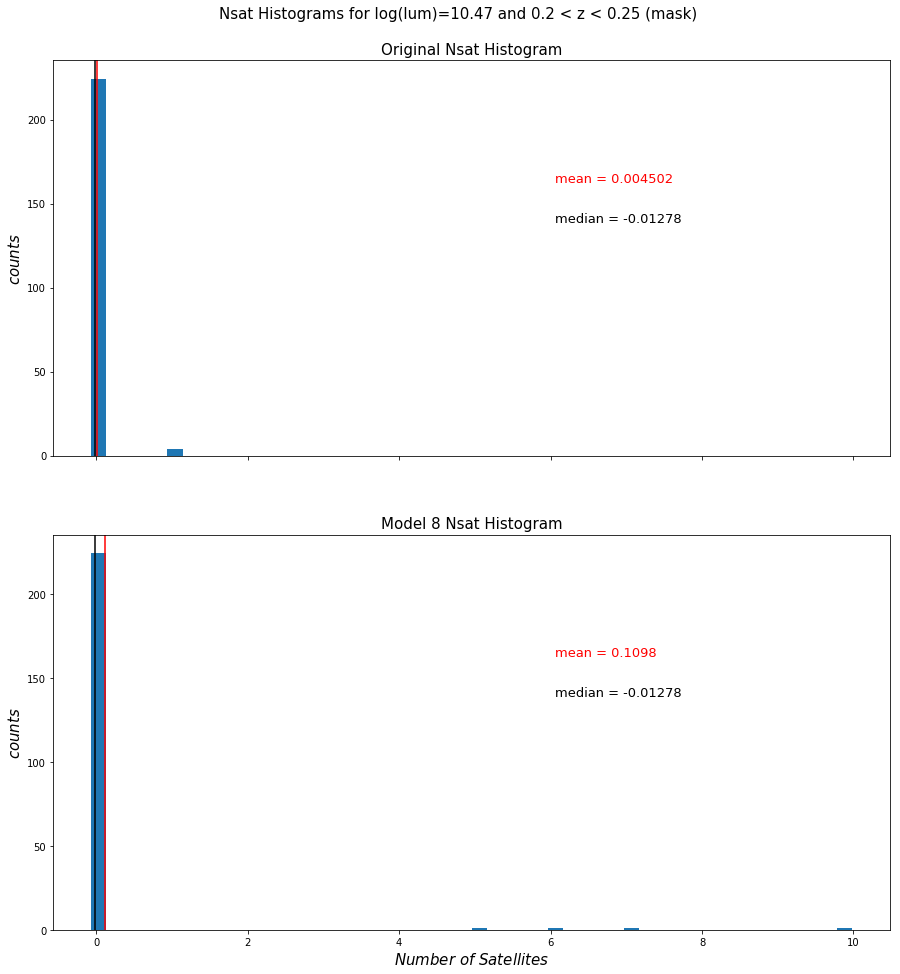

In [33]:
# plot Nsat25 and model Nsat25 (masked)

masked_og_sum25 = []
masked_model8_sum25 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_og_Nsat25)):
    masked_og_sum25.append(np.sum(masked_og_Nsat25[i]))
    masked_model8_sum25.append(np.sum(masked_model8_Nsat25[i]))

masked_og_mean25 = np.mean(masked_og_sum25)
print("mean number of near neighbors is", masked_og_mean25)

masked_model8_mean25 = np.mean(masked_model8_sum25)
print("mean number of near neighbors is", masked_model8_mean25)

masked_og_median25 = np.median(masked_og_sum25)
print("median number of near neighbors is", masked_og_median25)

masked_model8_median25 = np.median(masked_model8_sum25)
print("median number of near neighbors is", masked_model8_median25)

# # plot Nsat25 and model Nsat25 (unmasked)

# og_sum25 = []
# model8_sum25 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(Nsat25)):
#     og_sum25.append(np.sum(Nsat25[i]))
#     model8_sum25.append(np.sum(high_Nsat25[i]))

# og_mean25 = np.mean(og_sum25)
# print("mean number of near neighbors is", og_mean25)

# model8_mean25 = np.mean(model8_sum25)
# print("mean number of near neighbors is", model8_mean25)

# og_median25 = np.median(og_sum25)
# print("median number of near neighbors is", og_median25)

# model8_median25 = np.median(model8_sum25)
# print("median number of near neighbors is", model8_median25)

bins=np.histogram(np.hstack((masked_og_sum25,masked_model8_sum25)), bins=50)[1] #get the bin edges

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25,15), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.2 < z < 0.25 (mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(masked_og_sum25, bins)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=masked_og_mean25, color='r')
ax1.axvline(x=masked_og_median25, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_og_mean25), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_og_median25), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(masked_model8_sum25, bins)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=masked_model8_mean25, color='r')
ax2.axvline(x=masked_model8_median25, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_model8_mean25), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_model8_median25), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)


# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15)) #, sharex=True)
# fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.2 < z < 0.25 (no mask)', fontsize=15)
# fig.subplots_adjust(top=0.93)
# ax2.hist(og_sum25, bins=50)
# ax2.set_title('Original Nsat Histogram (no mask)', fontsize=14)
# ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax2.set_ylabel(r'$counts$', fontsize=13)
# ax2.axvline(x=og_mean25, color='r')
# ax2.axvline(x=og_median25, color='black')
# ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean25), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
# ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median25), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

# ax4.hist(model8_sum25, bins=50)
# ax4.set_title('Model 8 Nsat Histogram (no mask)', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax4.set_ylabel(r'$counts$', fontsize=15)
# ax4.axvline(x=model8_mean25, color='r')
# ax4.axvline(x=model8_median25, color='black')
# ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean25), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
# ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median25), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)


plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison25-v2.pdf')

plt.show()

mean number of near neighbors is 14.240153034932764
mean number of near neighbors is 14.3454161928275
median number of near neighbors is 9.604963656555793
median number of near neighbors is 10.327301586486312


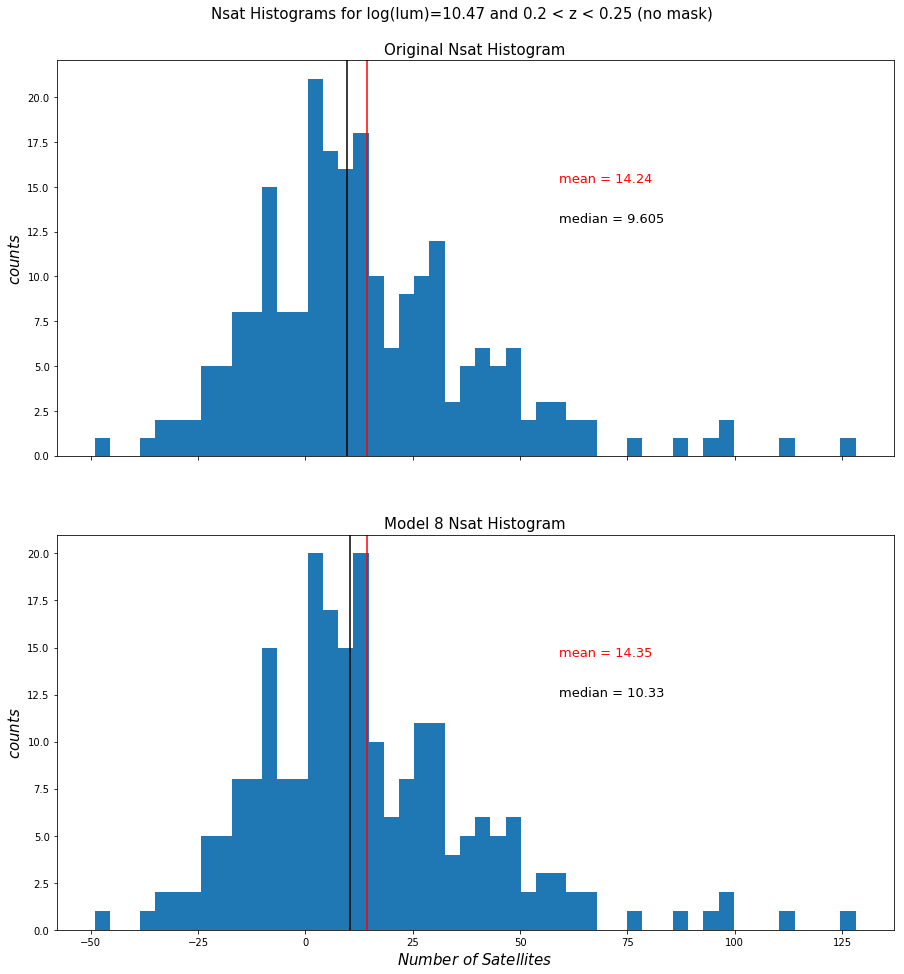

In [46]:
# plot Nsat25 and model Nsat25 (unmasked)

og_sum25 = []
model8_sum25 = []
# Sum up number of near neighbors for every LRG
for i in range(len(Nsat25)):
    og_sum25.append(np.sum(Nsat25[i]))
    model8_sum25.append(np.sum(high_Nsat25[i]))

og_mean25 = np.mean(og_sum25)
print("mean number of near neighbors is", og_mean25)

model8_mean25 = np.mean(model8_sum25)
print("mean number of near neighbors is", model8_mean25)

og_median25 = np.median(og_sum25)
print("median number of near neighbors is", og_median25)

model8_median25 = np.median(model8_sum25)
print("median number of near neighbors is", model8_median25)

# mediannear = np.median(sumnear)
# print("median number of near neighbors is", mediannear)

# sdnear = np.std(sumnear)
# print("standard deviation of near neighbor is", sdnear)

# sterrNear = stats.sem(sumnear)
# print("standard error is", sterrNear)

# plt.hist(og_near, bins=100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.2 < z < 0.25 (no mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(og_sum25, bins=50)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=og_mean25, color='r')
ax1.axvline(x=og_median25, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean25), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median25), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(model8_sum25, bins=50)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=model8_mean25, color='r')
ax2.axvline(x=model8_median25, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean25), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median25), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison25-unmasked.pdf')

plt.show()

mean number of near neighbors is 0.0
mean number of near neighbors is 0.0
median number of near neighbors is 0.0
median number of near neighbors is 0.0


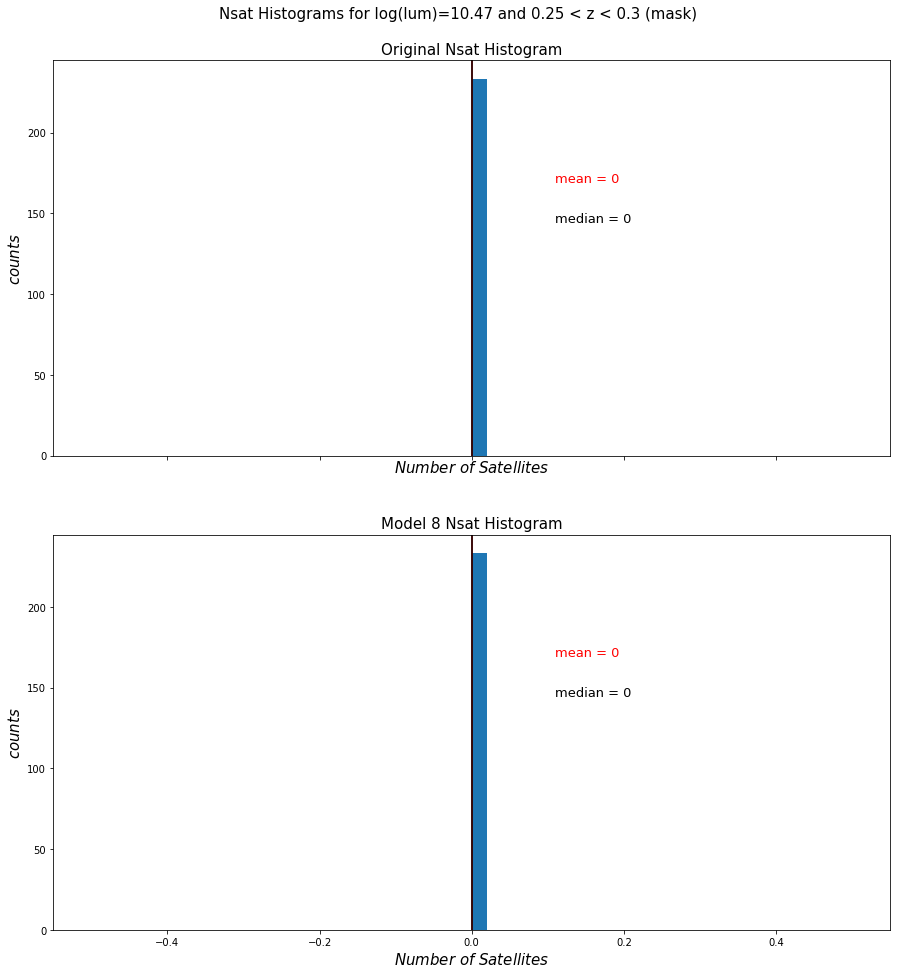

In [35]:
# plot Nsat03 and model Nsat03 (masked)

masked_og_sum03 = []
masked_model8_sum03 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_og_Nsat03)):
    masked_og_sum03.append(np.sum(masked_og_Nsat03[i]))
    masked_model8_sum03.append(np.sum(masked_model8_Nsat03[i]))

masked_og_mean03 = np.mean(masked_og_sum03)
print("mean number of near neighbors is", masked_og_mean03)

masked_model8_mean03 = np.mean(masked_model8_sum03)
print("mean number of near neighbors is", masked_model8_mean03)

masked_og_median03 = np.median(masked_og_sum03)
print("median number of near neighbors is", masked_og_median03)

masked_model8_median03 = np.median(masked_model8_sum03)
print("median number of near neighbors is", masked_model8_median03)

# # plot Nsat03 and model Nsat03 (unmasked)

# og_sum03 = []
# model8_sum03 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(Nsat03)):
#     og_sum03.append(np.sum(Nsat03[i]))
#     model8_sum03.append(np.sum(high_Nsat03[i]))

# og_mean03 = np.mean(og_sum03)
# print("mean number of near neighbors is", og_mean03)

# model8_mean03 = np.mean(model8_sum03)
# print("mean number of near neighbors is", model8_mean03)

# og_median03 = np.median(og_sum03)
# print("median number of near neighbors is", og_median03)

# model8_median03 = np.median(model8_sum03)
# print("median number of near neighbors is", model8_median03)

bins=np.histogram(np.hstack((masked_og_sum03,masked_model8_sum03)), bins=50)[1] #get the bin edges

# fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(25,15), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.25 < z < 0.3 (mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(masked_og_sum03, bins)
ax1.set_title('Original Nsat Histogram', fontsize=15)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=masked_og_mean03, color='r')
ax1.axvline(x=masked_og_median03, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_og_mean03), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_og_median03), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(masked_model8_sum03, bins)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=masked_model8_mean03, color='r')
ax2.axvline(x=masked_model8_median03, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_model8_mean03), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_model8_median03), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

# ax3.hist(og_sum03, bins=50)
# ax3.set_title('Original Nsat Histogram (no mask)', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax3.set_ylabel(r'$counts$', fontsize=13)
# ax3.axvline(x=og_mean03, color='r')
# ax3.axvline(x=og_median03, color='black')
# ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean03), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
# ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median03), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

# ax4.hist(model8_sum03, bins=50)
# ax4.set_title('Model 8 Nsat Histogram (no mask)', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax4.set_ylabel(r'$counts$', fontsize=15)
# ax4.axvline(x=model8_mean03, color='r')
# ax4.axvline(x=model8_median03, color='black')
# ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean03), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
# ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median03), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)


plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison03-v2.pdf')

plt.show()

mean number of near neighbors is 9.802597172094986
mean number of near neighbors is 9.802597172094986
median number of near neighbors is 8.186269831209234
median number of near neighbors is 8.186269831209234


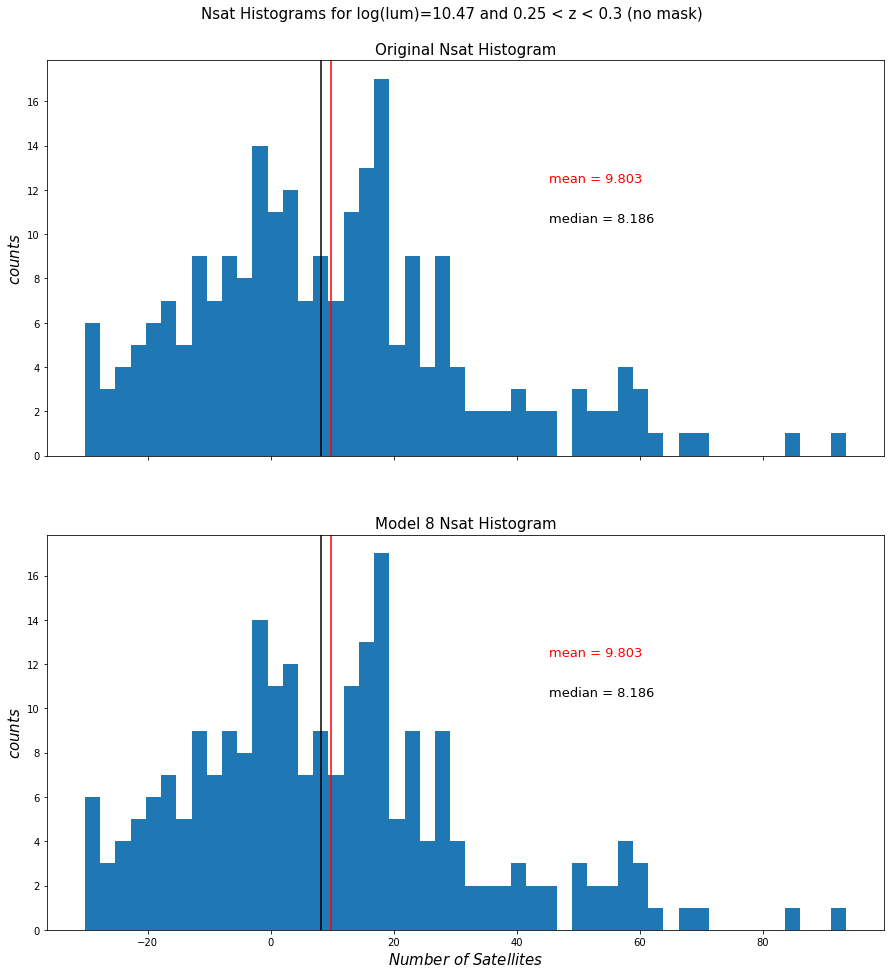

In [47]:
# plot Nsat03 and model Nsat03 (unmasked)

og_sum03 = []
model8_sum03 = []
# Sum up number of near neighbors for every LRG
for i in range(len(Nsat03)):
    og_sum03.append(np.sum(Nsat03[i]))
    model8_sum03.append(np.sum(high_Nsat03[i]))

og_mean03 = np.mean(og_sum03)
print("mean number of near neighbors is", og_mean03)

model8_mean03 = np.mean(model8_sum03)
print("mean number of near neighbors is", model8_mean03)

og_median03 = np.median(og_sum03)
print("median number of near neighbors is", og_median03)

model8_median03 = np.median(model8_sum03)
print("median number of near neighbors is", model8_median03)

# mediannear = np.median(sumnear)
# print("median number of near neighbors is", mediannear)

# sdnear = np.std(sumnear)
# print("standard deviation of near neighbor is", sdnear)

# sterrNear = stats.sem(sumnear)
# print("standard error is", sterrNear)

# plt.hist(og_near, bins=100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.25 < z < 0.3 (no mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(og_sum03, bins=50)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=og_mean03, color='r')
ax1.axvline(x=og_median03, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean03), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median03), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(model8_sum03, bins=50)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=model8_mean03, color='r')
ax2.axvline(x=model8_median03, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean03), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median03), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison03-unmasked.pdf')

plt.show()

mean number of near neighbors is -0.011001414968660663
mean number of near neighbors is 0.6936056311018001
median number of near neighbors is -0.08671421178229813
median number of near neighbors is -0.08671421178229813


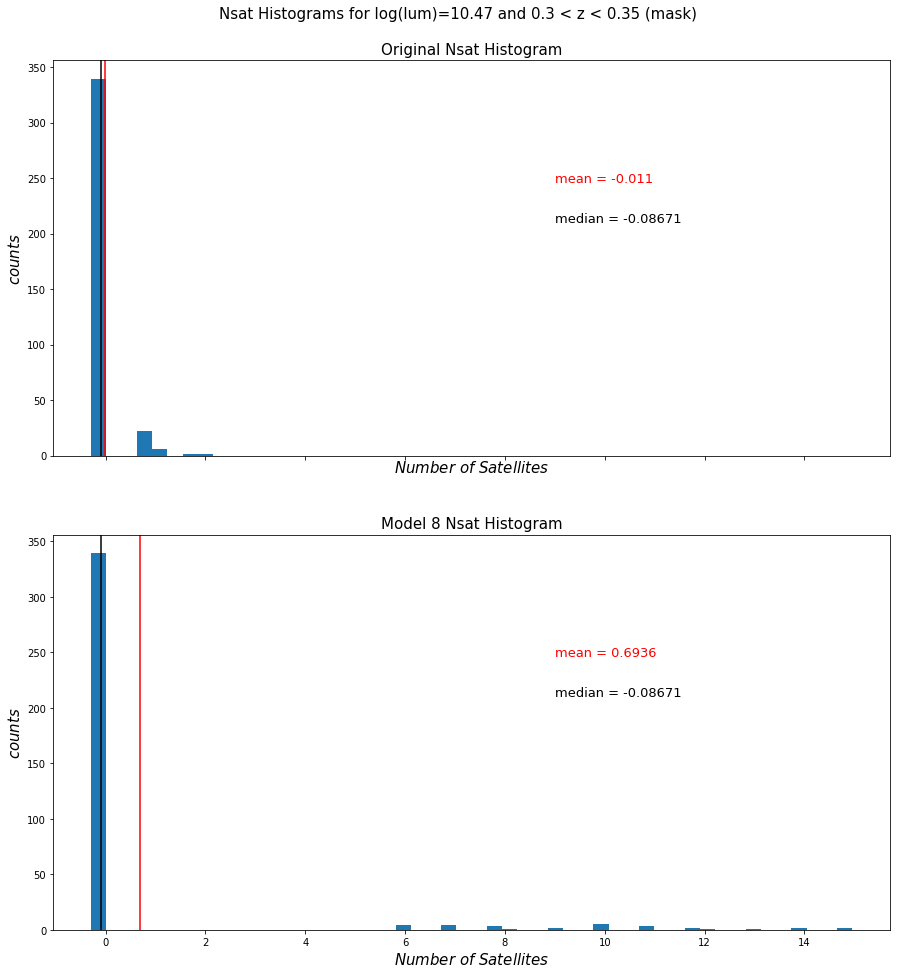

In [37]:
# plot Nsat35 and model Nsat35 (masked)

masked_og_sum35 = []
masked_model8_sum35 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_og_Nsat35)):
    masked_og_sum35.append(np.sum(masked_og_Nsat35[i]))
    masked_model8_sum35.append(np.sum(masked_model8_Nsat35[i]))

masked_og_mean35 = np.mean(masked_og_sum35)
print("mean number of near neighbors is", masked_og_mean35)

masked_model8_mean35 = np.mean(masked_model8_sum35)
print("mean number of near neighbors is", masked_model8_mean35)

masked_og_median35 = np.median(masked_og_sum35)
print("median number of near neighbors is", masked_og_median35)

masked_model8_median35 = np.median(masked_model8_sum35)
print("median number of near neighbors is", masked_model8_median35)

# # plot Nsat35 and model Nsat35 (unmasked)

# og_sum35 = []
# model8_sum35 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(Nsat35)):
#     og_sum35.append(np.sum(Nsat35[i]))
#     model8_sum35.append(np.sum(high_Nsat35[i]))

# og_mean35 = np.mean(og_sum35)
# print("mean number of near neighbors is", og_mean35)

# model8_mean35 = np.mean(model8_sum35)
# print("mean number of near neighbors is", model8_mean35)

# og_median35 = np.median(og_sum35)
# print("median number of near neighbors is", og_median35)

# model8_median35 = np.median(model8_sum35)
# print("median number of near neighbors is", model8_median35)

bins=np.histogram(np.hstack((masked_og_sum35,masked_model8_sum35)), bins=50)[1] #get the bin edges

# fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(25,15), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.3 < z < 0.35 (mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(masked_og_sum35, bins)
ax1.set_title('Original Nsat Histogram', fontsize=15)
ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=masked_og_mean35, color='r')
ax1.axvline(x=masked_og_median35, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_og_mean35), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_og_median35), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(masked_model8_sum35, bins)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=masked_model8_mean35, color='r')
ax2.axvline(x=masked_model8_median35, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_model8_mean35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_model8_median35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

# ax3.hist(og_sum35, bins=50)
# ax3.set_title('Original Nsat Histogram (no mask)', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax3.set_ylabel(r'$counts$', fontsize=13)
# ax3.axvline(x=og_mean35, color='r')
# ax3.axvline(x=og_median35, color='black')
# ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean35), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
# ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median35), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

# ax4.hist(model8_sum35, bins=50)
# ax4.set_title('Model 8 Nsat Histogram (no mask)', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax4.set_ylabel(r'$counts$', fontsize=15)
# ax4.axvline(x=model8_mean35, color='r')
# ax4.axvline(x=model8_median35, color='black')
# ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean35), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)
# ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median35), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison35-v2.pdf')

plt.show()

mean number of near neighbors is 9.19500198579741
mean number of near neighbors is 10.268172717504726
median number of near neighbors is 7.042807869813894
median number of near neighbors is 7.936323618472186


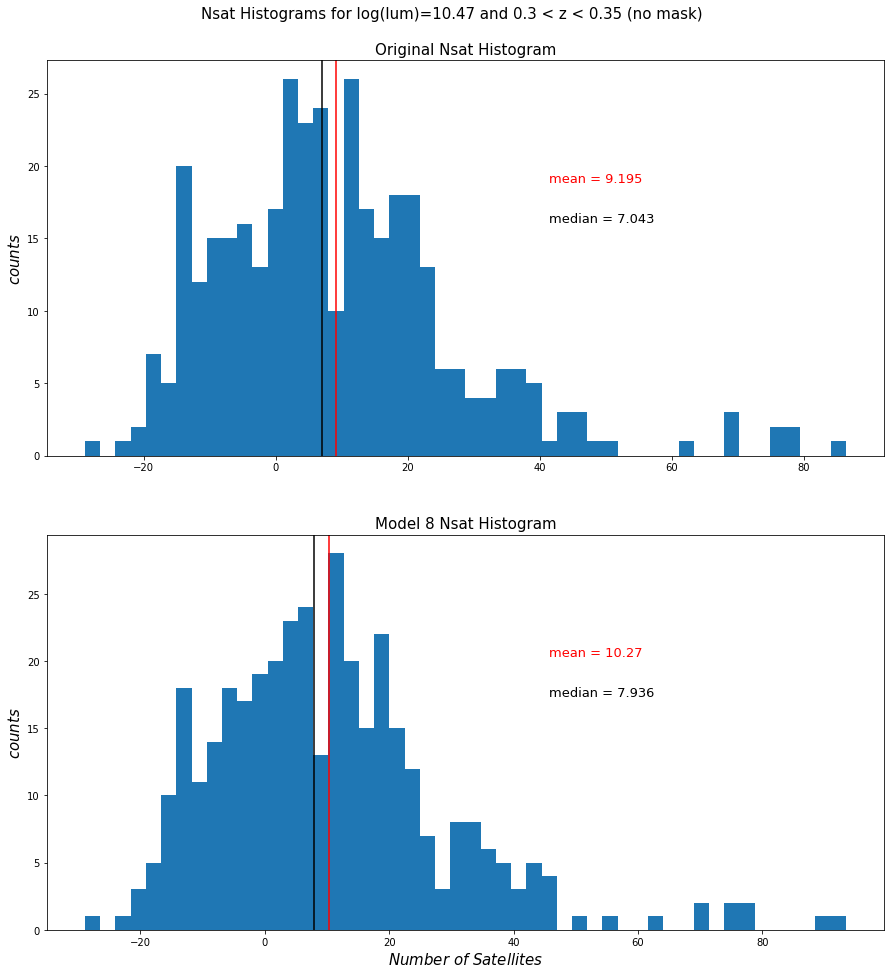

In [48]:
# plot Nsat35 and model Nsat35 (unmasked)

og_sum35 = []
model8_sum35 = []
# Sum up number of near neighbors for every LRG
for i in range(len(Nsat35)):
    og_sum35.append(np.sum(Nsat35[i]))
    model8_sum35.append(np.sum(high_Nsat35[i]))

og_mean35 = np.mean(og_sum35)
print("mean number of near neighbors is", og_mean35)

model8_mean35 = np.mean(model8_sum35)
print("mean number of near neighbors is", model8_mean35)

og_median35 = np.median(og_sum35)
print("median number of near neighbors is", og_median35)

model8_median35 = np.median(model8_sum35)
print("median number of near neighbors is", model8_median35)

# mediannear = np.median(sumnear)
# print("median number of near neighbors is", mediannear)

# sdnear = np.std(sumnear)
# print("standard deviation of near neighbor is", sdnear)

# sterrNear = stats.sem(sumnear)
# print("standard error is", sterrNear)

# plt.hist(og_near, bins=100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15)) #, sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.3 < z < 0.35 (no mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(og_sum35, bins=50)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=og_mean35, color='r')
ax1.axvline(x=og_median35, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean35), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median35), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(model8_sum35, bins=50)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=model8_mean35, color='r')
ax2.axvline(x=model8_median35, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison35-unmasked.pdf')

plt.show()

mean number of near neighbors is 0.013815646043628615
mean number of near neighbors is 1.092304018136652
median number of near neighbors is -0.12802095265140065
median number of near neighbors is -0.12802095265140065


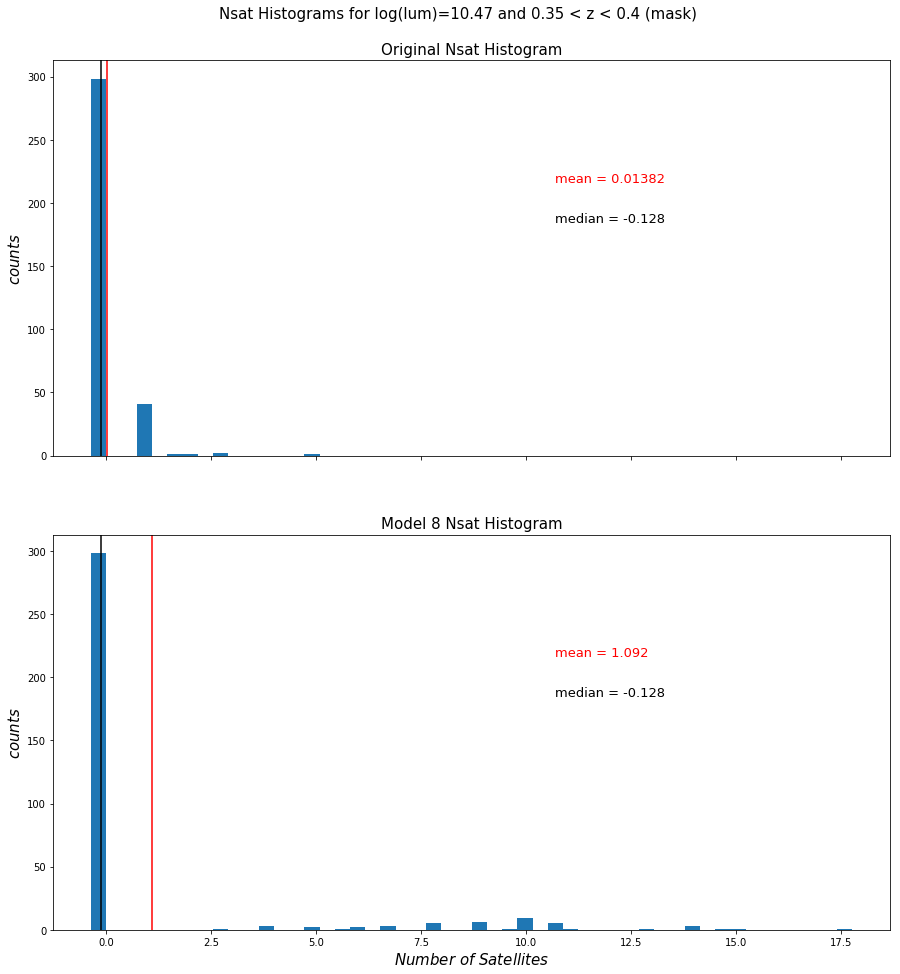

In [42]:
# plot Nsat04 and model Nsat04 (masked)

masked_og_sum04 = []
masked_model8_sum04 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_og_Nsat04)):
    masked_og_sum04.append(np.sum(masked_og_Nsat04[i]))
    masked_model8_sum04.append(np.sum(masked_model8_Nsat04[i]))

masked_og_mean04 = np.mean(masked_og_sum04)
print("mean number of near neighbors is", masked_og_mean04)

masked_model8_mean04 = np.mean(masked_model8_sum04)
print("mean number of near neighbors is", masked_model8_mean04)

masked_og_median04 = np.median(masked_og_sum04)
print("median number of near neighbors is", masked_og_median04)

masked_model8_median04 = np.median(masked_model8_sum04)
print("median number of near neighbors is", masked_model8_median04)

# # plot Nsat04 and model Nsat04 (unmasked)

# og_sum04 = []
# model8_sum04 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(Nsat04)):
#     og_sum04.append(np.sum(Nsat04[i]))
#     model8_sum04.append(np.sum(high_Nsat04[i]))

# og_mean04 = np.mean(og_sum04)
# print("mean number of near neighbors is", og_mean04)

# model8_mean04 = np.mean(model8_sum04)
# print("mean number of near neighbors is", model8_mean04)

# og_median04 = np.median(og_sum04)
# print("median number of near neighbors is", og_median04)

# model8_median04 = np.median(model8_sum04)
# print("median number of near neighbors is", model8_median04)

bins=np.histogram(np.hstack((masked_og_sum04,masked_model8_sum04)), bins=50)[1] #get the bin edges

# fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(25,15), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.35 < z < 0.4 (mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(masked_og_sum04, bins)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=masked_og_mean04, color='r')
ax1.axvline(x=masked_og_median04, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_og_mean04), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_og_median04), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(masked_model8_sum04, bins=50)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=masked_model8_mean04, color='r')
ax2.axvline(x=masked_model8_median04, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_model8_mean04), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_model8_median04), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

# ax3.hist(og_sum04, bins=50)
# ax3.set_title('Original Nsat Histogram (no mask)', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax3.set_ylabel(r'$counts$', fontsize=13)
# ax3.axvline(x=og_mean04, color='r')
# ax3.axvline(x=og_median04, color='black')
# ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean04), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
# ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median04), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

# ax4.hist(model8_sum04, bins=50)
# ax4.set_title('Model 8 Nsat Histogram (no mask)', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax4.set_ylabel(r'$counts$', fontsize=15)
# ax4.axvline(x=model8_mean04, color='r')
# ax4.axvline(x=model8_median04, color='black')
# ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean04), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
# ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median04), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)


plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison04-v2.pdf')

plt.show()

mean number of near neighbors is 7.303010057150494
mean number of near neighbors is 8.55591703389468
median number of near neighbors is 6.17311163294344
median number of near neighbors is 7.773101926161557


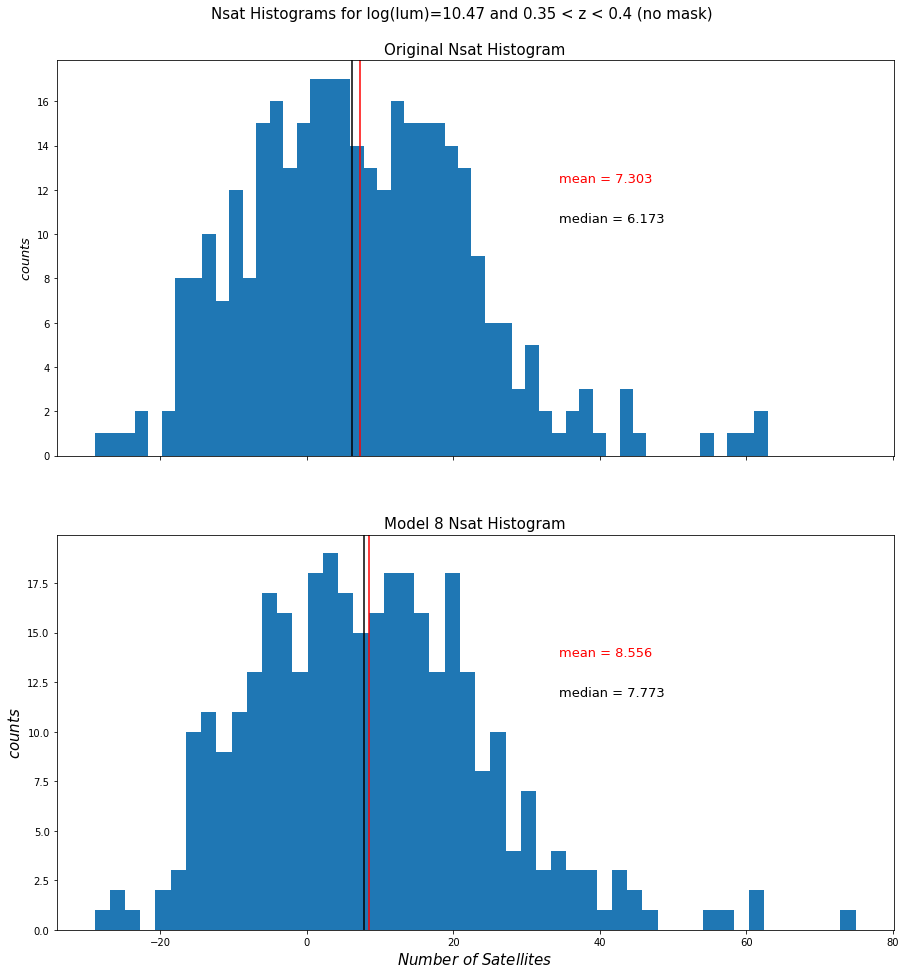

In [49]:
# plot Nsat04 and model Nsat04 (unmasked)

og_sum04 = []
model8_sum04 = []
# Sum up number of near neighbors for every LRG
for i in range(len(Nsat04)):
    og_sum04.append(np.sum(Nsat04[i]))
    model8_sum04.append(np.sum(high_Nsat04[i]))

og_mean04 = np.mean(og_sum04)
print("mean number of near neighbors is", og_mean04)

model8_mean04 = np.mean(model8_sum04)
print("mean number of near neighbors is", model8_mean04)

og_median04 = np.median(og_sum04)
print("median number of near neighbors is", og_median04)

model8_median04 = np.median(model8_sum04)
print("median number of near neighbors is", model8_median04)

# mediannear = np.median(sumnear)
# print("median number of near neighbors is", mediannear)

# sdnear = np.std(sumnear)
# print("standard deviation of near neighbor is", sdnear)

# sterrNear = stats.sem(sumnear)
# print("standard error is", sterrNear)

# plt.hist(og_near, bins=100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.35 < z < 0.4 (no mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(og_sum04, bins=50)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=og_mean04, color='r')
ax1.axvline(x=og_median04, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean04), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median04), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(model8_sum04, bins=50)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=model8_mean04, color='r')
ax2.axvline(x=model8_median04, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean04), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median04), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison04-unmasked.pdf')

plt.show()

mean number of near neighbors is 0.0680513145867321
mean number of near neighbors is 2.2214493728391593
median number of near neighbors is -0.24610210066398638
median number of near neighbors is -0.24610210066398638


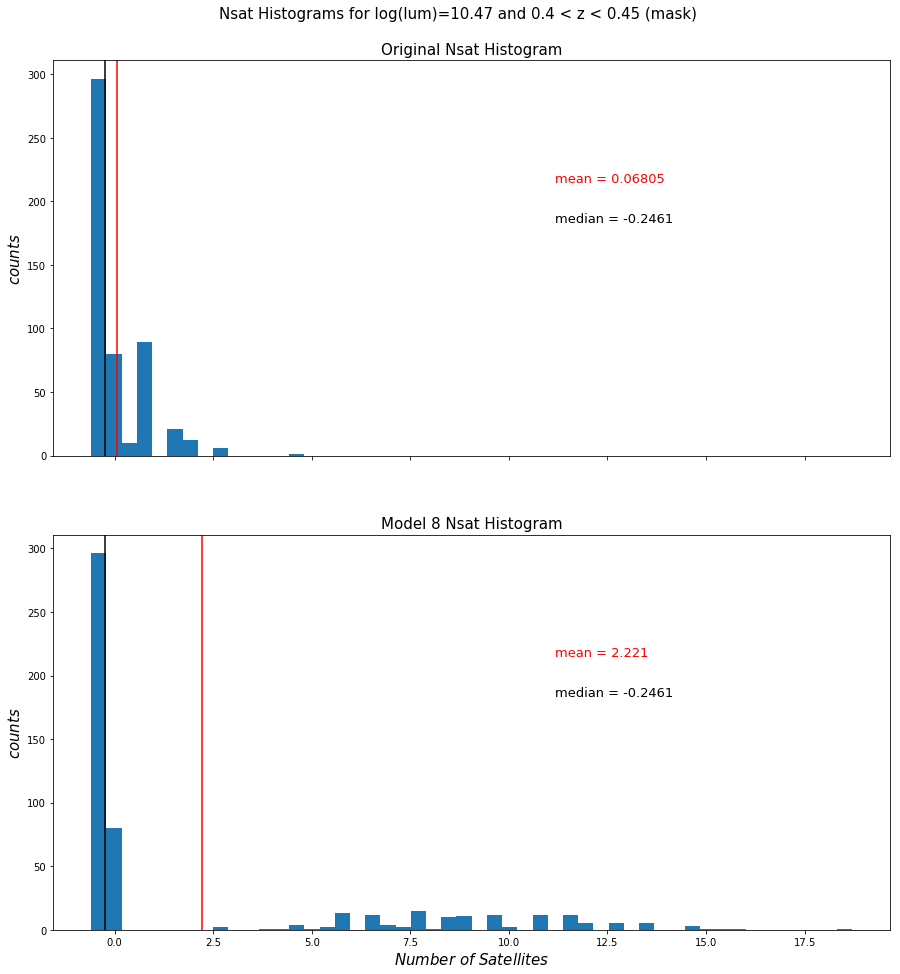

In [52]:
# plot Nsat45 and model Nsat45 (masked)

masked_og_sum45 = []
masked_model8_sum45 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_og_Nsat45)):
    masked_og_sum45.append(np.sum(masked_og_Nsat45[i]))
    masked_model8_sum45.append(np.sum(masked_model8_Nsat45[i]))

masked_og_mean45 = np.mean(masked_og_sum45)
print("mean number of near neighbors is", masked_og_mean45)

masked_model8_mean45 = np.mean(masked_model8_sum45)
print("mean number of near neighbors is", masked_model8_mean45)

masked_og_median45 = np.median(masked_og_sum45)
print("median number of near neighbors is", masked_og_median45)

masked_model8_median45 = np.median(masked_model8_sum45)
print("median number of near neighbors is", masked_model8_median45)

# # plot Nsat45 and model Nsat45 (unmasked)

# og_sum45 = []
# model8_sum45 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(Nsat45)):
#     og_sum45.append(np.sum(Nsat45[i]))
#     model8_sum45.append(np.sum(high_Nsat45[i]))

# og_mean45 = np.mean(og_sum45)
# print("mean number of near neighbors is", og_mean45)

# model8_mean45 = np.mean(model8_sum45)
# print("mean number of near neighbors is", model8_mean45)

# og_median45 = np.median(og_sum45)
# print("median number of near neighbors is", og_median45)

# model8_median45 = np.median(model8_sum45)
# print("median number of near neighbors is", model8_median45)

bins=np.histogram(np.hstack((masked_og_sum45,masked_model8_sum45)), bins=50)[1] #get the bin edges

# fig, ((ax1, ax3),(ax2, ax4)) = plt.subplots(2, 2, figsize=(25,15), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.4 < z < 0.45 (mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(masked_og_sum45, bins)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=masked_og_mean45, color='r')
ax1.axvline(x=masked_og_median45, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_og_mean45), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_og_median45), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(masked_model8_sum45, bins)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=masked_model8_mean45, color='r')
ax2.axvline(x=masked_model8_median45, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_model8_mean45), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_model8_median45), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

# ax3.hist(og_sum45, bins=50)
# ax3.set_title('Original Nsat Histogram (no mask)', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax3.set_ylabel(r'$counts$', fontsize=13)
# ax3.axvline(x=og_mean45, color='r')
# ax3.axvline(x=og_median45, color='black')
# ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean45), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
# ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median45), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

# ax4.hist(model8_sum45, bins=50)
# ax4.set_title('Model 8 Nsat Histogram (no mask)', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax4.set_ylabel(r'$counts$', fontsize=15)
# ax4.axvline(x=model8_mean45, color='r')
# ax4.axvline(x=model8_median45, color='black')
# ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean45), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
# ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median45), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)


plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison45-v2.pdf')

plt.show()

mean number of near neighbors is 6.940020118245079
mean number of near neighbors is 9.3050686619344
median number of near neighbors is 4.982463914772273
median number of near neighbors is 7.296358973450161


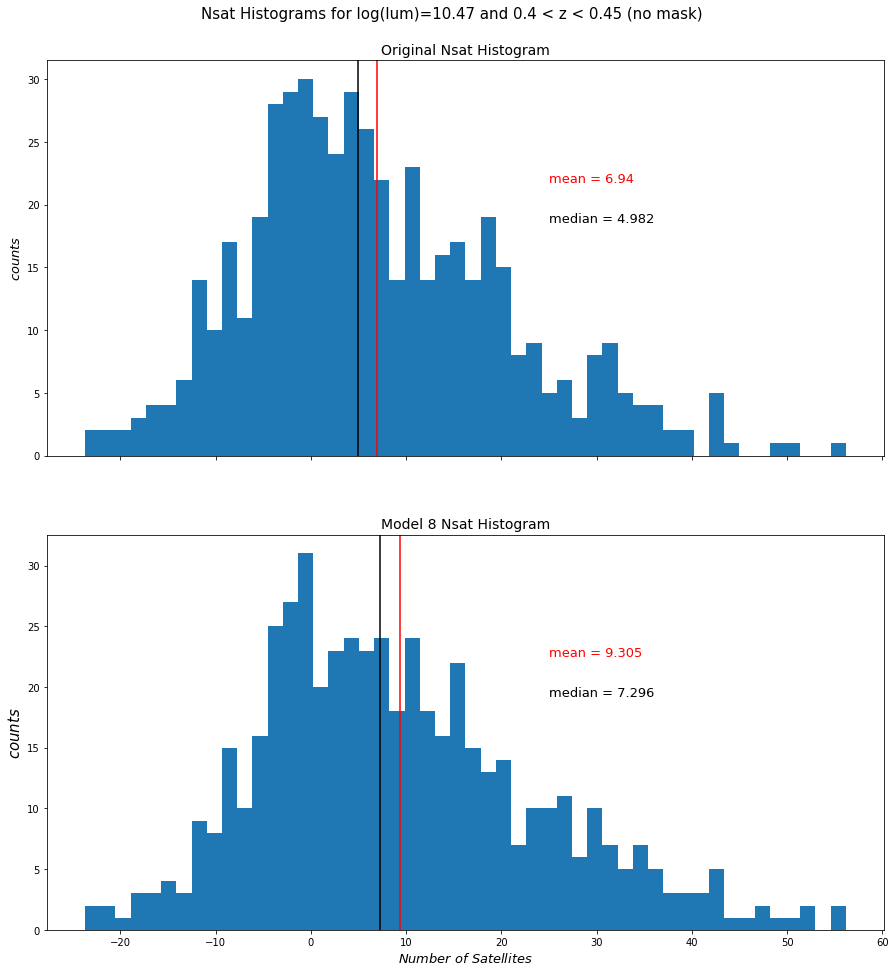

In [64]:
# plot Nsat45 and model Nsat45 (unmasked)

og_sum45 = []
model8_sum45 = []
# Sum up number of near neighbors for every LRG
for i in range(len(Nsat45)):
    og_sum45.append(np.sum(Nsat45[i]))
    model8_sum45.append(np.sum(high_Nsat45[i]))

og_mean45 = np.mean(og_sum45)
print("mean number of near neighbors is", og_mean45)

model8_mean45 = np.mean(model8_sum45)
print("mean number of near neighbors is", model8_mean45)

og_median45 = np.median(og_sum45)
print("median number of near neighbors is", og_median45)

model8_median45 = np.median(model8_sum45)
print("median number of near neighbors is", model8_median45)

# mediannear = np.median(sumnear)
# print("median number of near neighbors is", mediannear)

# sdnear = np.std(sumnear)
# print("standard deviation of near neighbor is", sdnear)

# sterrNear = stats.sem(sumnear)
# print("standard error is", sterrNear)

# plt.hist(og_near, bins=100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.4 < z < 0.45 (no mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(og_sum45, bins=50)
ax1.set_title('Original Nsat Histogram', fontsize=14)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=og_mean45, color='r')
ax1.axvline(x=og_median45, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean45), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median45), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(model8_sum45, bins=50)
ax2.set_title('Model 8 Nsat Histogram', fontsize=14)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=model8_mean45, color='r')
ax2.axvline(x=model8_median45, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean45), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median45), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison45-unmasked.pdf')

plt.show()

mean number of near neighbors is 0.17482761463844054
mean number of near neighbors is 3.6511309321739853
median number of near neighbors is -0.2786500591308675
median number of near neighbors is -0.2786500591308675


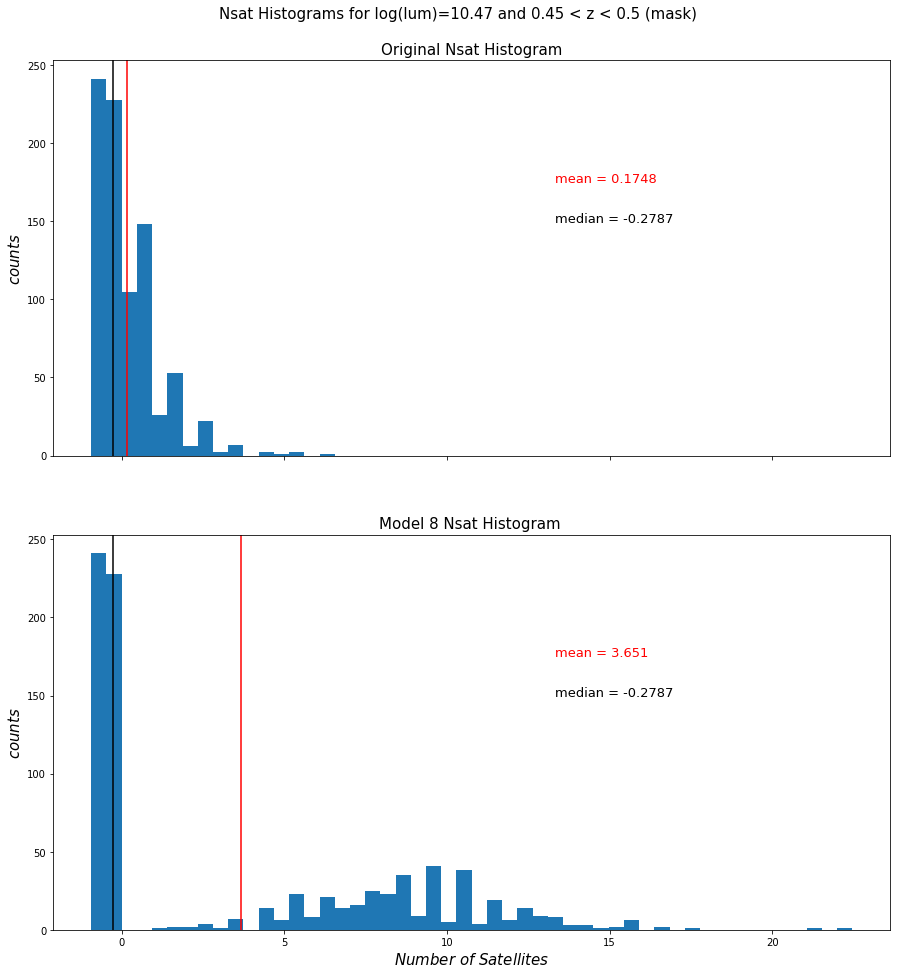

In [57]:
# plot Nsat05 and model Nsat05 (masked)

masked_og_sum05 = []
masked_model8_sum05 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_og_Nsat05)):
    masked_og_sum05.append(np.sum(masked_og_Nsat05[i]))
    masked_model8_sum05.append(np.sum(masked_model8_Nsat05[i]))

masked_og_mean05 = np.mean(masked_og_sum05)
print("mean number of near neighbors is", masked_og_mean05)

masked_model8_mean05 = np.mean(masked_model8_sum05)
print("mean number of near neighbors is", masked_model8_mean05)

masked_og_median05 = np.median(masked_og_sum05)
print("median number of near neighbors is", masked_og_median05)

masked_model8_median05 = np.median(masked_model8_sum05)
print("median number of near neighbors is", masked_model8_median05)

# # plot Nsat05 and model Nsat05 (unmasked)

# og_sum05 = []
# model8_sum05 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(Nsat05)):
#     og_sum05.append(np.sum(Nsat05[i]))
#     model8_sum05.append(np.sum(high_Nsat05[i]))

# og_mean05 = np.mean(og_sum05)
# print("mean number of near neighbors is", og_mean05)

# model8_mean05 = np.mean(model8_sum05)
# print("mean number of near neighbors is", model8_mean05)

# og_median05 = np.median(og_sum05)
# print("median number of near neighbors is", og_median05)

# model8_median05 = np.median(model8_sum05)
# print("median number of near neighbors is", model8_median05)

bins=np.histogram(np.hstack((masked_og_sum05,masked_model8_sum05)), bins=50)[1] #get the bin edges

# fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(25,15), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.45 < z < 0.5 (mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(masked_og_sum05, bins)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=masked_og_mean05, color='r')
ax1.axvline(x=masked_og_median05, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_og_mean05), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_og_median05), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(masked_model8_sum05, bins)
ax2.set_title('Model 8 Nsat Histogram ', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=masked_model8_mean05, color='r')
ax2.axvline(x=masked_model8_median05, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_model8_mean05), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_model8_median05), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

# ax3.hist(og_sum05, bins=50)
# ax3.set_title('Original Nsat Histogram (no mask)', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax3.set_ylabel(r'$counts$', fontsize=13)
# ax3.axvline(x=og_mean05, color='r')
# ax3.axvline(x=og_median05, color='black')
# ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean05), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
# ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median05), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

# ax4.hist(model8_sum05, bins=50)
# ax4.set_title('Model 8 Nsat Histogram (no mask)', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax4.set_ylabel(r'$counts$', fontsize=15)
# ax4.axvline(x=model8_mean05, color='r')
# ax4.axvline(x=model8_median05, color='black')
# ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean05), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
# ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median05), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)


plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison05-v2.pdf')

plt.show()

mean number of near neighbors is 6.625607992691551
mean number of near neighbors is 10.47039472254937
median number of near neighbors is 5.337218059129762
median number of near neighbors is 9.49457482535177


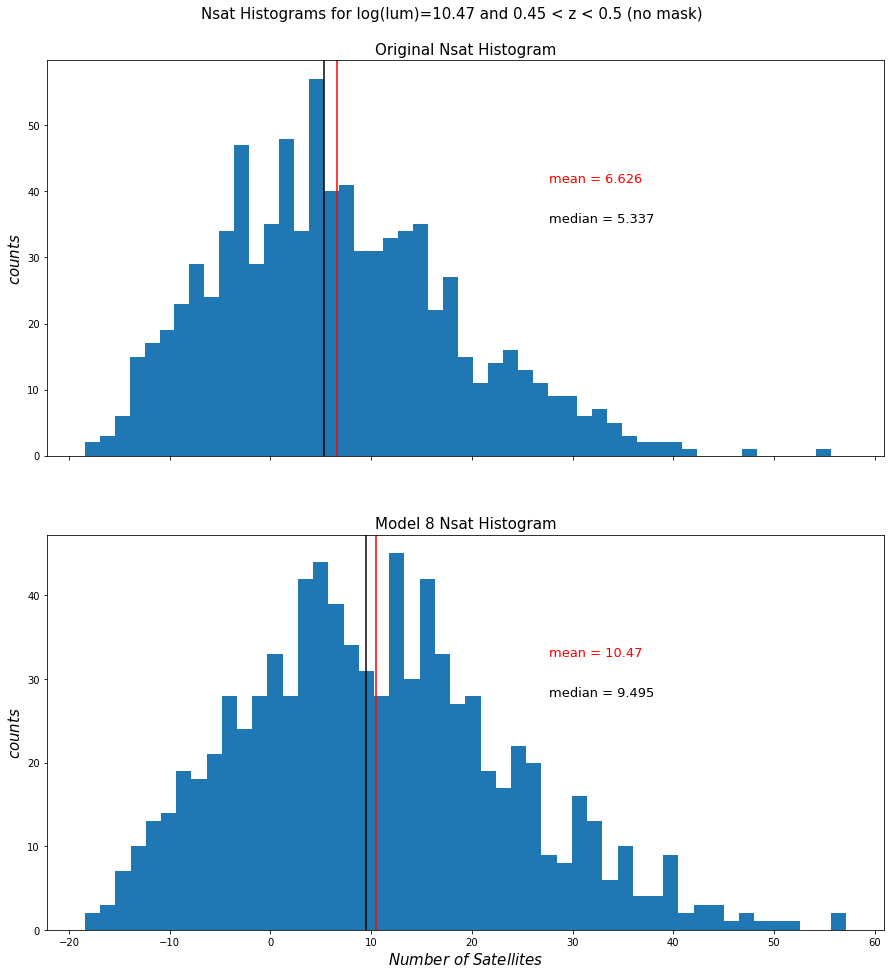

In [63]:
# plot Nsat05 and model Nsat05 (unmasked)

og_sum05 = []
model8_sum05 = []
# Sum up number of near neighbors for every LRG
for i in range(len(Nsat05)):
    og_sum05.append(np.sum(Nsat05[i]))
    model8_sum05.append(np.sum(high_Nsat05[i]))

og_mean05 = np.mean(og_sum05)
print("mean number of near neighbors is", og_mean05)

model8_mean05 = np.mean(model8_sum05)
print("mean number of near neighbors is", model8_mean05)

og_median05 = np.median(og_sum05)
print("median number of near neighbors is", og_median05)

model8_median05 = np.median(model8_sum05)
print("median number of near neighbors is", model8_median05)

# mediannear = np.median(sumnear)
# print("median number of near neighbors is", mediannear)

# sdnear = np.std(sumnear)
# print("standard deviation of near neighbor is", sdnear)

# sterrNear = stats.sem(sumnear)
# print("standard error is", sterrNear)

# plt.hist(og_near, bins=100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.45 < z < 0.5 (no mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(og_sum05, bins=50)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=og_mean05, color='r')
ax1.axvline(x=og_median05, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean05), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median05), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(model8_sum05, bins=50)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=model8_mean05, color='r')
ax2.axvline(x=model8_median05, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean05), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median05), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison05-unmasked.pdf')

plt.show()

mean number of near neighbors is 0.1076556474325881
mean number of near neighbors is 3.5775585600539475
median number of near neighbors is -0.3160531753276956
median number of near neighbors is -0.3160531753276956


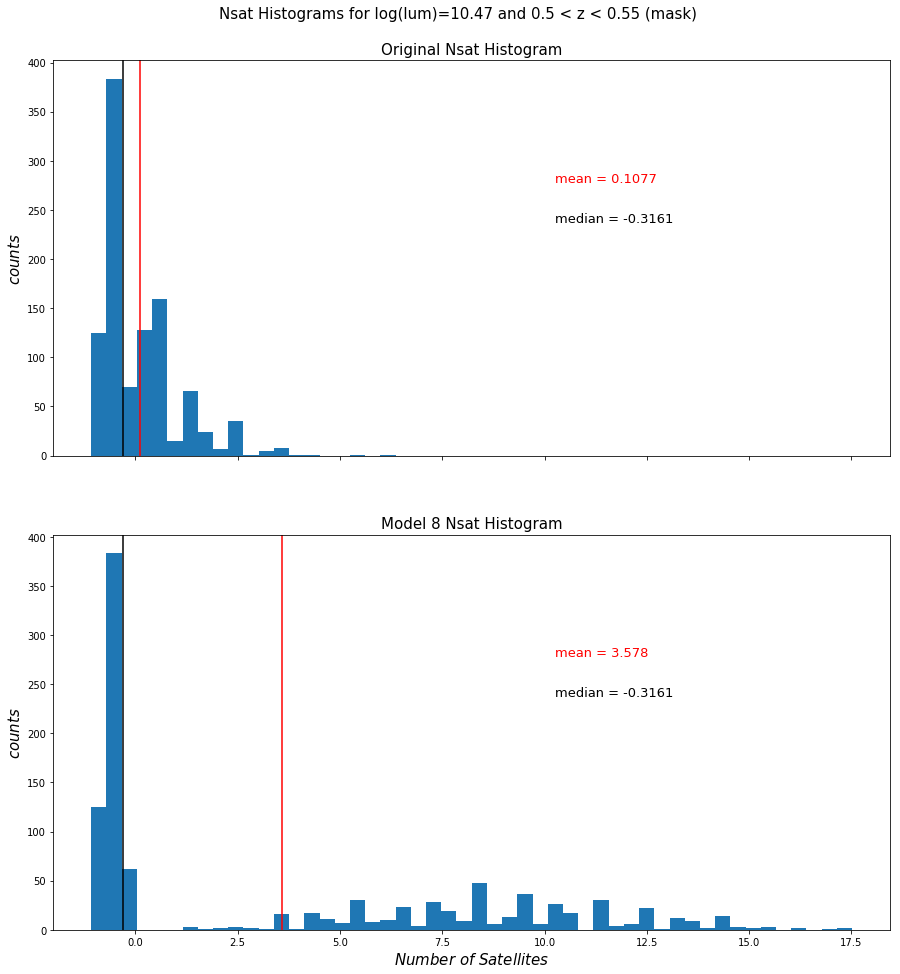

In [61]:
# plot Nsat55 and model Nsat55 (masked)

masked_og_sum55 = []
masked_model8_sum55 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_og_Nsat55)):
    masked_og_sum55.append(np.sum(masked_og_Nsat55[i]))
    masked_model8_sum55.append(np.sum(masked_model8_Nsat55[i]))

masked_og_mean55 = np.mean(masked_og_sum55)
print("mean number of near neighbors is", masked_og_mean55)

masked_model8_mean55 = np.mean(masked_model8_sum55)
print("mean number of near neighbors is", masked_model8_mean55)

masked_og_median55 = np.median(masked_og_sum55)
print("median number of near neighbors is", masked_og_median55)

masked_model8_median55 = np.median(masked_model8_sum55)
print("median number of near neighbors is", masked_model8_median55)

# # plot Nsat55 and model Nsat55 (unmasked)

# og_sum55 = []
# model8_sum55 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(Nsat55)):
#     og_sum55.append(np.sum(Nsat55[i]))
#     model8_sum55.append(np.sum(high_Nsat55[i]))

# og_mean55 = np.mean(og_sum55)
# print("mean number of near neighbors is", og_mean55)

# model8_mean55 = np.mean(model8_sum55)
# print("mean number of near neighbors is", model8_mean55)

# og_median55 = np.median(og_sum55)
# print("median number of near neighbors is", og_median55)

# model8_median55 = np.median(model8_sum55)
# print("median number of near neighbors is", model8_median55)

bins=np.histogram(np.hstack((masked_og_sum55,masked_model8_sum55)), bins=50)[1] #get the bin edges

# fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(25,15), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.5 < z < 0.55 (mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(masked_og_sum55, bins)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=masked_og_mean55, color='r')
ax1.axvline(x=masked_og_median55, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_og_mean55), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_og_median55), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(masked_model8_sum55, bins)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=masked_model8_mean55, color='r')
ax2.axvline(x=masked_model8_median55, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_model8_mean55), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_model8_median55), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

# ax3.hist(og_sum55, bins=50)
# ax3.set_title('Original Nsat Histogram (no mask)', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax3.set_ylabel(r'$counts$', fontsize=13)
# ax3.axvline(x=og_mean55, color='r')
# ax3.axvline(x=og_median55, color='black')
# ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean55), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
# ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median55), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

# ax4.hist(model8_sum55, bins=50)
# ax4.set_title('Model 8 Nsat Histogram (no mask)', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax4.set_ylabel(r'$counts$', fontsize=15)
# ax4.axvline(x=model8_mean55, color='r')
# ax4.axvline(x=model8_median55, color='black')
# ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean55), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
# ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median55), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)


plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison55-v2.pdf')

plt.show()

mean number of near neighbors is 4.885118433853781
mean number of near neighbors is 8.81618639501883
median number of near neighbors is 3.7294866203462433
median number of near neighbors is 7.695592436734094


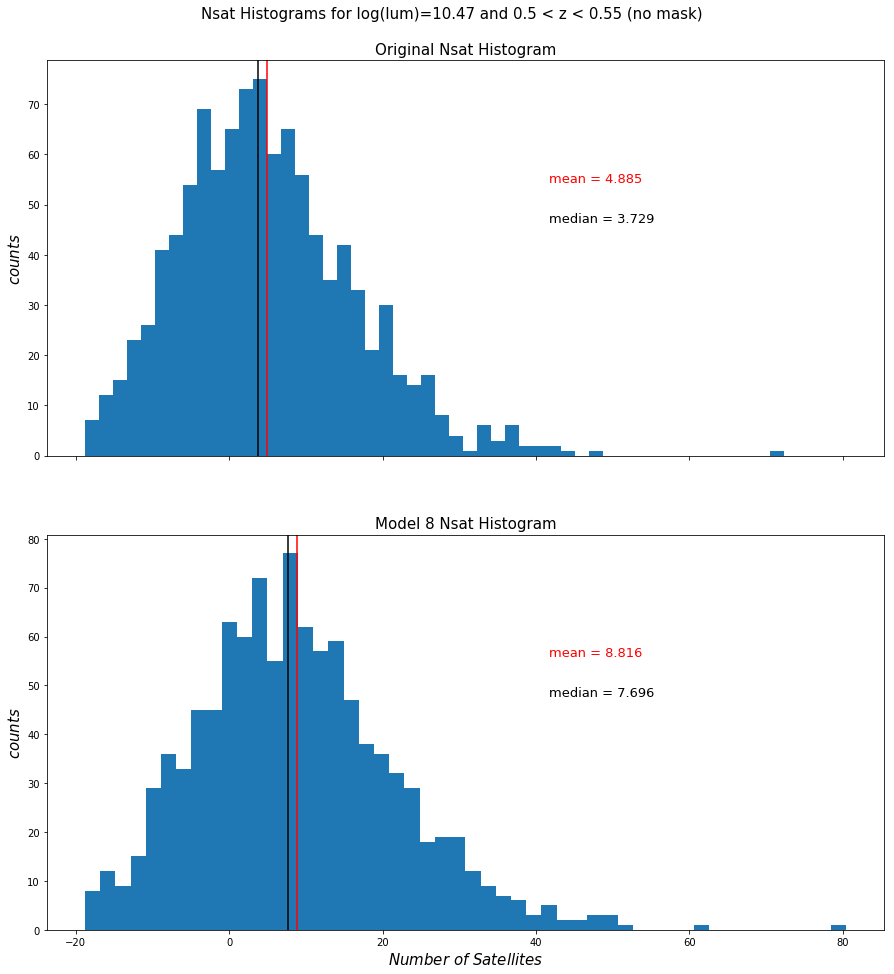

In [65]:
# plot Nsat55 and model Nsat55 (unmasked)

og_sum55 = []
model8_sum55 = []
# Sum up number of near neighbors for every LRG
for i in range(len(Nsat55)):
    og_sum55.append(np.sum(Nsat55[i]))
    model8_sum55.append(np.sum(high_Nsat55[i]))

og_mean55 = np.mean(og_sum55)
print("mean number of near neighbors is", og_mean55)

model8_mean55 = np.mean(model8_sum55)
print("mean number of near neighbors is", model8_mean55)

og_median55 = np.median(og_sum55)
print("median number of near neighbors is", og_median55)

model8_median55 = np.median(model8_sum55)
print("median number of near neighbors is", model8_median55)

# mediannear = np.median(sumnear)
# print("median number of near neighbors is", mediannear)

# sdnear = np.std(sumnear)
# print("standard deviation of near neighbor is", sdnear)

# sterrNear = stats.sem(sumnear)
# print("standard error is", sterrNear)

# plt.hist(og_near, bins=100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.5 < z < 0.55 (no mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(og_sum55, bins=50)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=og_mean55, color='r')
ax1.axvline(x=og_median55, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean55), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median55), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(model8_sum55, bins=50)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=model8_mean55, color='r')
ax2.axvline(x=model8_median55, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean55), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median55), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison55-unmasked.pdf')

plt.show()

mean number of near neighbors is 0.3221971683224719
mean number of near neighbors is 5.351086057211361
median number of near neighbors is -0.02090053634878672
median number of near neighbors is 6.374596444671476


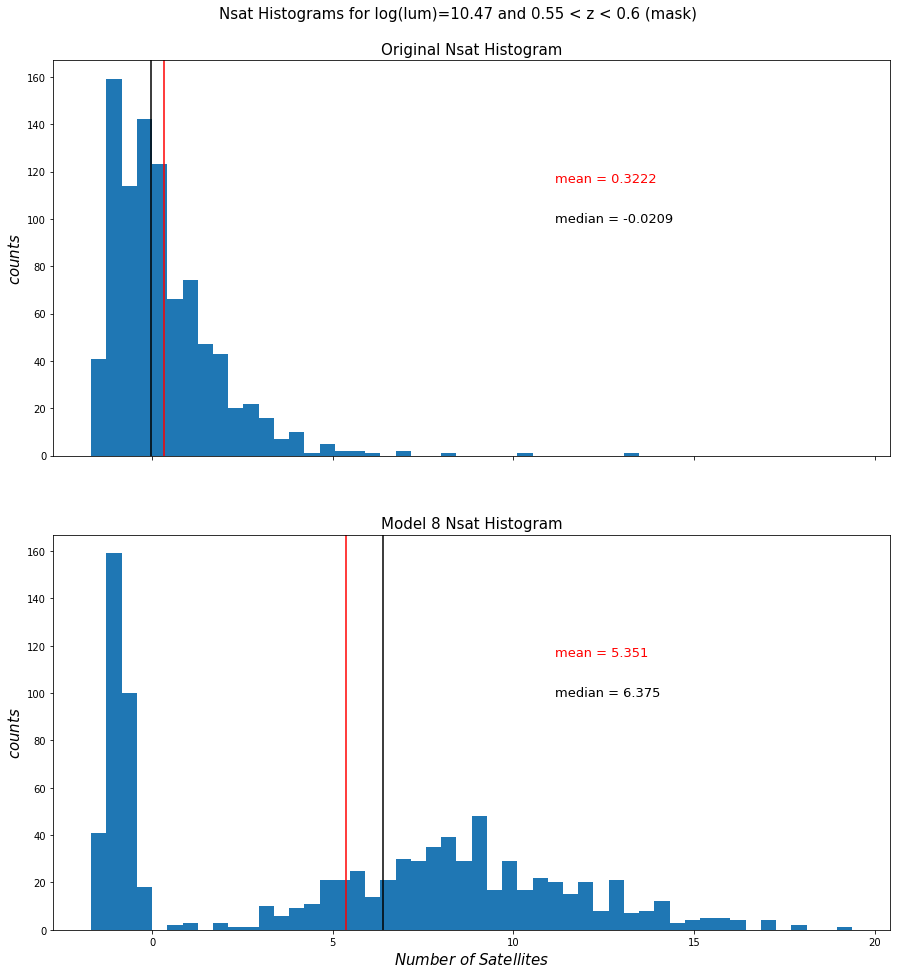

In [67]:
# plot Nsat06 and model Nsat06 (masked)

masked_og_sum06 = []
masked_model8_sum06 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_og_Nsat06)):
    masked_og_sum06.append(np.sum(masked_og_Nsat06[i]))
    masked_model8_sum06.append(np.sum(masked_model8_Nsat06[i]))

masked_og_mean06 = np.mean(masked_og_sum06)
print("mean number of near neighbors is", masked_og_mean06)

masked_model8_mean06 = np.mean(masked_model8_sum06)
print("mean number of near neighbors is", masked_model8_mean06)

masked_og_median06 = np.median(masked_og_sum06)
print("median number of near neighbors is", masked_og_median06)

masked_model8_median06 = np.median(masked_model8_sum06)
print("median number of near neighbors is", masked_model8_median06)

# # plot Nsat06 and model Nsat06 (unmasked)

# og_sum06 = []
# model8_sum06 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(Nsat06)):
#     og_sum06.append(np.sum(Nsat06[i]))
#     model8_sum06.append(np.sum(high_Nsat06[i]))

# og_mean06 = np.mean(og_sum06)
# print("mean number of near neighbors is", og_mean06)

# model8_mean06 = np.mean(model8_sum06)
# print("mean number of near neighbors is", model8_mean06)

# og_median06 = np.median(og_sum06)
# print("median number of near neighbors is", og_median06)

# model8_median06 = np.median(model8_sum06)
# print("median number of near neighbors is", model8_median06)

bins=np.histogram(np.hstack((masked_og_sum06,masked_model8_sum06)), bins=50)[1] #get the bin edges

# fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(25,15), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.55 < z < 0.6 (mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(masked_og_sum06, bins)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=135
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=masked_og_mean06, color='r')
ax1.axvline(x=masked_og_median06, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_og_mean06), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_og_median06), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(masked_model8_sum06, bins)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=masked_model8_mean06, color='r')
ax2.axvline(x=masked_model8_median06, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_model8_mean06), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_model8_median06), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

# ax3.hist(og_sum06, bins=50)
# ax3.set_title('Original Nsat Histogram (no mask)', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax3.set_ylabel(r'$counts$', fontsize=13)
# ax3.axvline(x=og_mean06, color='r')
# ax3.axvline(x=og_median06, color='black')
# ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean06), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
# ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median06), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

# ax4.hist(model8_sum06, bins=50)
# ax4.set_title('Model 8 Nsat Histogram (no mask)', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax4.set_ylabel(r'$counts$', fontsize=15)
# ax4.axvline(x=model8_mean06, color='r')
# ax4.axvline(x=model8_median06, color='black')
# ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean06), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
# ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median06), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)


plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison06-v2.pdf')

plt.show()

mean number of near neighbors is 5.485149836887511
mean number of near neighbors is 10.937372059109732
median number of near neighbors is 4.319511054399376
median number of near neighbors is 10.446169634677581


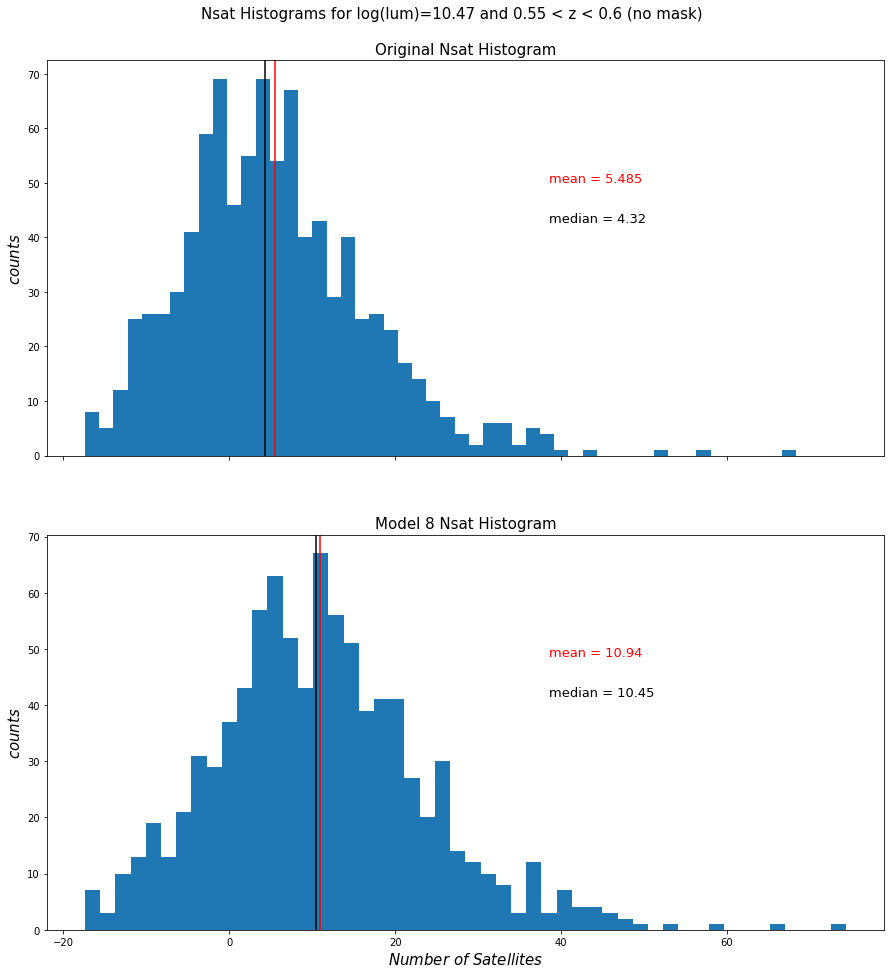

In [69]:
# plot Nsat06 and model Nsat06 (unmasked)

og_sum06 = []
model8_sum06 = []
# Sum up number of near neighbors for every LRG
for i in range(len(Nsat06)):
    og_sum06.append(np.sum(Nsat06[i]))
    model8_sum06.append(np.sum(high_Nsat06[i]))

og_mean06 = np.mean(og_sum06)
print("mean number of near neighbors is", og_mean06)

model8_mean06 = np.mean(model8_sum06)
print("mean number of near neighbors is", model8_mean06)

og_median06 = np.median(og_sum06)
print("median number of near neighbors is", og_median06)

model8_median06 = np.median(model8_sum06)
print("median number of near neighbors is", model8_median06)

# mediannear = np.median(sumnear)
# print("median number of near neighbors is", mediannear)

# sdnear = np.std(sumnear)
# print("standard deviation of near neighbor is", sdnear)

# sterrNear = stats.sem(sumnear)
# print("standard error is", sterrNear)

# plt.hist(og_near, bins=100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.55 < z < 0.6 (no mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(og_sum06, bins=50)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=og_mean06, color='r')
ax1.axvline(x=og_median06, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean06), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median06), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(model8_sum06, bins=50)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=model8_mean06, color='r')
ax2.axvline(x=model8_median06, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean06), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median06), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison06-unmasked.pdf')

plt.show()

mean number of near neighbors is 0.17958775931290688
mean number of near neighbors is 4.978470440877152
median number of near neighbors is -0.11851908844455605
median number of near neighbors is 5.745085788952745


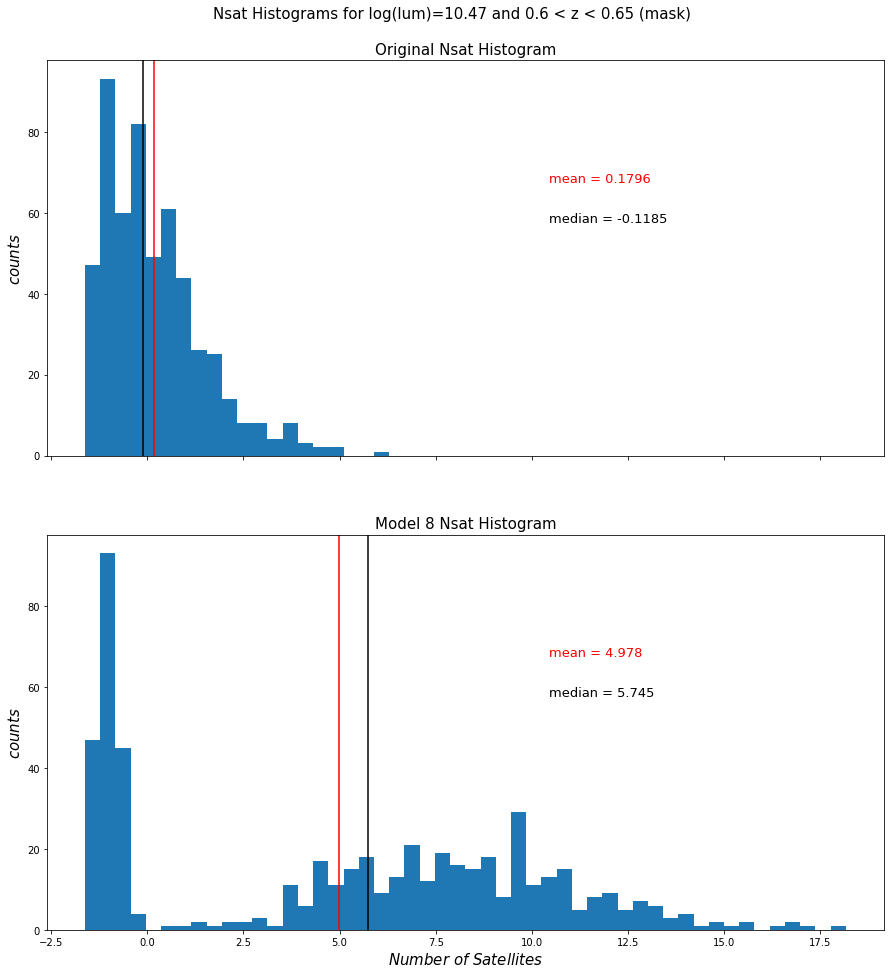

In [71]:
# plot Nsat65 and model Nsat65 (masked)

masked_og_sum65 = []
masked_model8_sum65 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_og_Nsat65)):
    masked_og_sum65.append(np.sum(masked_og_Nsat65[i]))
    masked_model8_sum65.append(np.sum(masked_model8_Nsat65[i]))

masked_og_mean65 = np.mean(masked_og_sum65)
print("mean number of near neighbors is", masked_og_mean65)

masked_model8_mean65 = np.mean(masked_model8_sum65)
print("mean number of near neighbors is", masked_model8_mean65)

masked_og_median65 = np.median(masked_og_sum65)
print("median number of near neighbors is", masked_og_median65)

masked_model8_median65 = np.median(masked_model8_sum65)
print("median number of near neighbors is", masked_model8_median65)

# # plot Nsat65 and model Nsat65 (unmasked)

# og_sum65 = []
# model8_sum65 = []
# # Sum up number of near neighbors for every LRG
# for i in range(len(Nsat65)):
#     og_sum65.append(np.sum(Nsat65[i]))
#     model8_sum65.append(np.sum(high_Nsat65[i]))

# og_mean65 = np.mean(og_sum65)
# print("mean number of near neighbors is", og_mean65)

# model8_mean65 = np.mean(model8_sum65)
# print("mean number of near neighbors is", model8_mean65)

# og_median65 = np.median(og_sum65)
# print("median number of near neighbors is", og_median65)

# model8_median65 = np.median(model8_sum65)
# print("median number of near neighbors is", model8_median65)

bins=np.histogram(np.hstack((masked_og_sum65,masked_model8_sum65)), bins=50)[1] #get the bin edges

# fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(25,15), sharex=True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.6 < z < 0.65 (mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(masked_og_sum65, bins)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=masked_og_mean65, color='r')
ax1.axvline(x=masked_og_median65, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_og_mean65), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_og_median65), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(masked_model8_sum65, bins)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=masked_model8_mean65, color='r')
ax2.axvline(x=masked_model8_median65, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(masked_model8_mean65), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(masked_model8_median65), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

# ax3.hist(og_sum65, bins=50)
# ax3.set_title('Original Nsat Histogram (no mask)', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax3.set_ylabel(r'$counts$', fontsize=13)
# ax3.axvline(x=og_mean65, color='r')
# ax3.axvline(x=og_median65, color='black')
# ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean65), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
# ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median65), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

# ax4.hist(model8_sum65, bins=50)
# ax4.set_title('Model 8 Nsat Histogram (no mask)', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=13)
# ax4.set_ylabel(r'$counts$', fontsize=15)
# ax4.axvline(x=model8_mean65, color='r')
# ax4.axvline(x=model8_median65, color='black')
# ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean65), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
# ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median65), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)


plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison65-v2.pdf')

plt.show()

mean number of near neighbors is 4.428152234277923
mean number of near neighbors is 10.139511638374758
median number of near neighbors is 3.6449438646713546
median number of near neighbors is 9.47087604041598


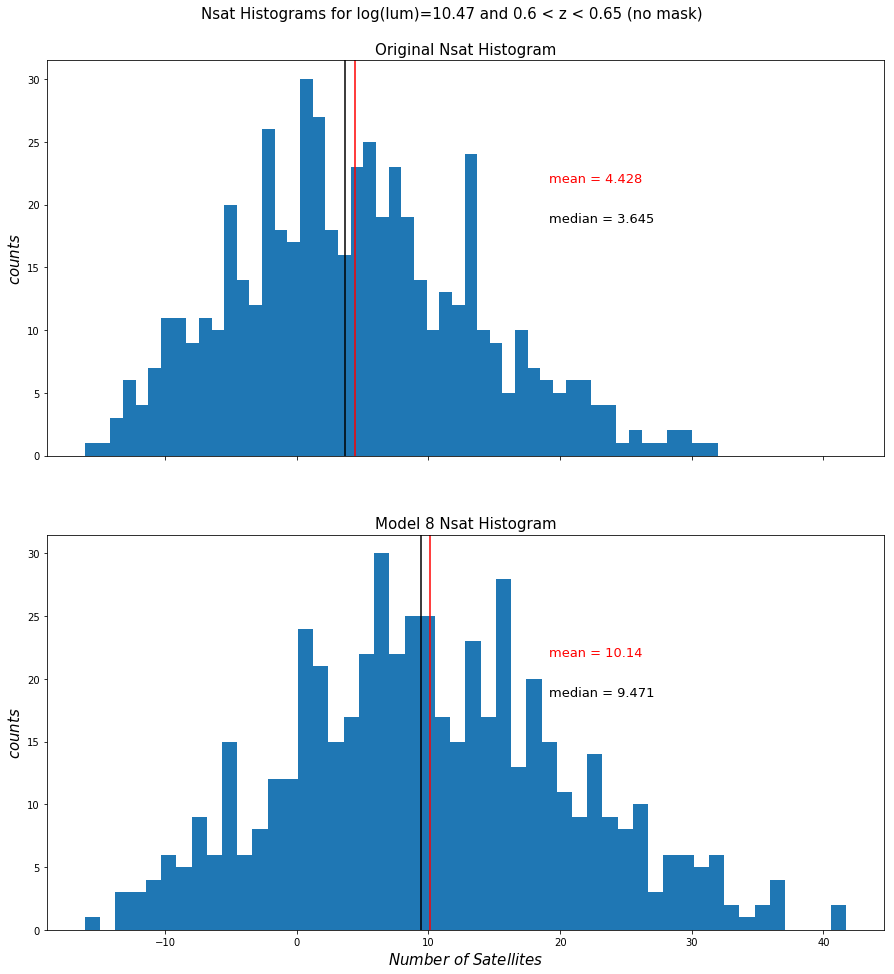

In [73]:
# plot Nsat65 and model Nsat65 (unmasked)

og_sum65 = []
model8_sum65 = []
# Sum up number of near neighbors for every LRG
for i in range(len(Nsat65)):
    og_sum65.append(np.sum(Nsat65[i]))
    model8_sum65.append(np.sum(high_Nsat65[i]))

og_mean65 = np.mean(og_sum65)
print("mean number of near neighbors is", og_mean65)

model8_mean65 = np.mean(model8_sum65)
print("mean number of near neighbors is", model8_mean65)

og_median65 = np.median(og_sum65)
print("median number of near neighbors is", og_median65)

model8_median65 = np.median(model8_sum65)
print("median number of near neighbors is", model8_median65)

# mediannear = np.median(sumnear)
# print("median number of near neighbors is", mediannear)

# sdnear = np.std(sumnear)
# print("standard deviation of near neighbor is", sdnear)

# sterrNear = stats.sem(sumnear)
# print("standard error is", sterrNear)

# plt.hist(og_near, bins=100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=10.47 and 0.6 < z < 0.65 (no mask)', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(og_sum65, bins=50)
ax1.set_title('Original Nsat Histogram', fontsize=15)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax1.set_ylabel(r'$counts$', fontsize=15)
ax1.axvline(x=og_mean65, color='r')
ax1.axvline(x=og_median65, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(og_mean65), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(og_median65), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(model8_sum65, bins=50)
ax2.set_title('Model 8 Nsat Histogram', fontsize=15)
ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=15)
ax2.set_ylabel(r'$counts$', fontsize=15)
ax2.axvline(x=model8_mean65, color='r')
ax2.axvline(x=model8_median65, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(model8_mean65), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(model8_median65), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/04Dec2020/high_Nsat_model8_comparison65-unmasked.pdf')

plt.show()